# Grupo

ERIKA ALVES - RA 419113655  
JEAN SANTOS - RA 1419100688     
LUCAS DE PAULA - RA 2219104443      
MARCOS VINICIUS - RA 2219112101     
WALBER TAVARES - RA 2219104359  
YAN MORENO - RA 2219103461

##### Entrega de Data Frame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import re 

In [3]:
df2012 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2012.csv')
df2013 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2013.csv')
df2014 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2014.csv')
df2015 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2015.csv')
df2016 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2016.csv')

/tmp/ipykernel_8533/2415120530.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2013 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2013.csv')
/tmp/ipykernel_8533/2415120530.py:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2015 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2015.csv')


In [4]:
df2012.shape, df2013.shape, df2014.shape, df2015.shape, df2016.shape

((211076, 23), (268096, 23), (267764, 23), (255650, 23), (203486, 23))

In [5]:
df_lista = [df2012, df2013, df2014, df2015, df2016]

In [6]:
df_Main = pd.concat(df_lista)

In [7]:
df_Main.shape

(1206072, 23)

In [8]:
df_Main.to_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-Full.csv')

#### Analise exploratoria

In [9]:
df_Main.head(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2012,2012-07-13 17:44:45.000,2009-09-17 10:48:42.000,3,Sudeste,ES,IBI PROMOTORA DE VENDAS LTDA.,IBI CARD,1,7.448120e+13,...,7490104.0,ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...,N,54,Cartão de Crédito,32.0,Calculo de prestação em atraso,F,mais de 70 anos,29072040
1,2012,2012-07-13 17:37:19.000,2009-09-17 10:02:24.000,3,Sudeste,ES,SAMSUNG ELETRONICA DA AMAZONIA LTDA,SAMSUNG,1,2.802730e+11,...,2640000.0,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",N,101,"Telefone ( Convencional, Celular, Interfone, E...",102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos,29115360
2,2012,2012-07-16 09:07:13.000,2009-09-17 11:36:47.000,3,Sudeste,ES,LINNU''S AUTOMOVEIS LTDA.,LINNUS AUTOMOVEIS,1,3.635548e+13,...,4512902.0,COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES,N,129,Carro Nacional Zero ( Montadora ),111.0,Venda enganosa,M,entre 21 a 30 anos,29060110
3,2012,2012-12-10 09:05:09.000,2009-09-21 09:01:49.000,5,Centro-oeste,GO,AMAZON PC INDUSTRIA E COMERCIO DE MICROCOMPUTA...,AMAZON PC,1,1.614079e+12,...,2621300.0,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,S,102,Microcomputador / Produtos de Informática,102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 21 a 30 anos,75911000
4,2012,2012-07-13 17:51:01.000,2009-09-18 17:32:22.000,3,Sudeste,ES,OFFICINA REVESTIMENTOS LTDA ME,NaN,1,5.444155e+12,...,4744005.0,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...,N,118,Material de Acabamento de Construção Pronto (P...,116.0,"Contrato/pedido/orçamento (rescisão, descumpri...",M,Nao Informada,29090120


In [10]:
df_analise = df_Main[['AnoCalendario','Regiao', 'strNomeFantasia', 'Atendida', 'SexoConsumidor', 'CodigoAssunto', 'CodigoRegiao']]

In [11]:
df_analise.head()

,AnoCalendario,Regiao,strNomeFantasia,Atendida,SexoConsumidor,CodigoAssunto,CodigoRegiao
0,2012,Sudeste,IBI CARD,N,F,54,3
1,2012,Sudeste,SAMSUNG,N,M,101,3
2,2012,Sudeste,LINNUS AUTOMOVEIS,N,M,129,3
3,2012,Centro-oeste,AMAZON PC,S,M,102,5
4,2012,Sudeste,NaN,N,M,118,3


In [12]:
df_analise1 = pd.get_dummies(df_analise, columns=['Atendida', 'SexoConsumidor'], drop_first=True)

In [13]:
df_analise1.head()

,AnoCalendario,Regiao,strNomeFantasia,CodigoAssunto,CodigoRegiao,Atendida_S,SexoConsumidor_M,SexoConsumidor_N
0,2012,Sudeste,IBI CARD,54,3,0,0,0
1,2012,Sudeste,SAMSUNG,101,3,0,1,0
2,2012,Sudeste,LINNUS AUTOMOVEIS,129,3,0,1,0
3,2012,Centro-oeste,AMAZON PC,102,5,1,1,0
4,2012,Sudeste,NaN,118,3,0,1,0


In [14]:
df_analise1 = df_analise1.drop('SexoConsumidor_N', axis=1)

In [15]:
df_analise1.head()

,AnoCalendario,Regiao,strNomeFantasia,CodigoAssunto,CodigoRegiao,Atendida_S,SexoConsumidor_M
0,2012,Sudeste,IBI CARD,54,3,0,0
1,2012,Sudeste,SAMSUNG,101,3,0,1
2,2012,Sudeste,LINNUS AUTOMOVEIS,129,3,0,1
3,2012,Centro-oeste,AMAZON PC,102,5,1,1
4,2012,Sudeste,NaN,118,3,0,1


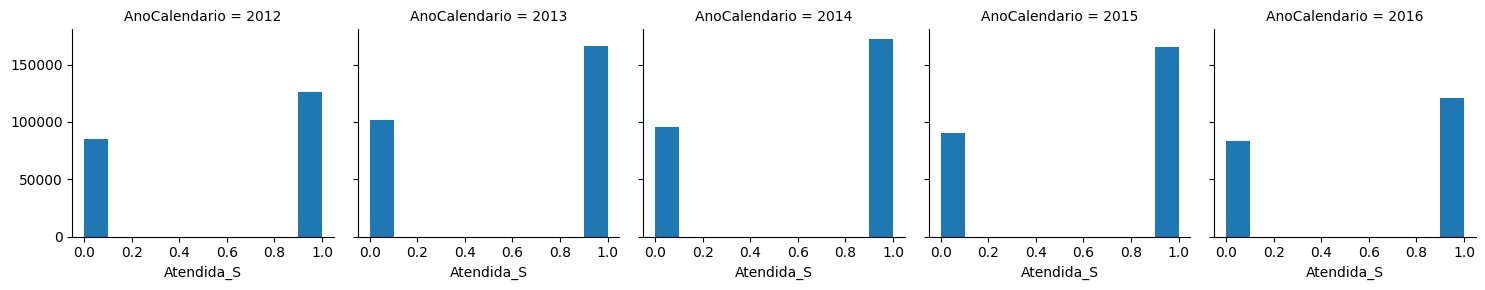

In [16]:
aten = sns.FacetGrid(df_analise1, col='AnoCalendario')
aten.map(plt.hist, 'Atendida_S', bins=10)

In [17]:
df_analise2 = df_analise1[['CodigoAssunto', 'AnoCalendario', 'Atendida_S', 'CodigoRegiao']]

In [18]:
df_analise2

,CodigoAssunto,AnoCalendario,Atendida_S,CodigoRegiao
0,54,2012,0,3
1,101,2012,0,3
2,129,2012,0,3
3,102,2012,1,5
4,118,2012,0,3
...,...,...,...,...
203481,187,2016,1,3
203482,185,2016,0,3
203483,264,2016,1,3
203484,53,2016,1,3


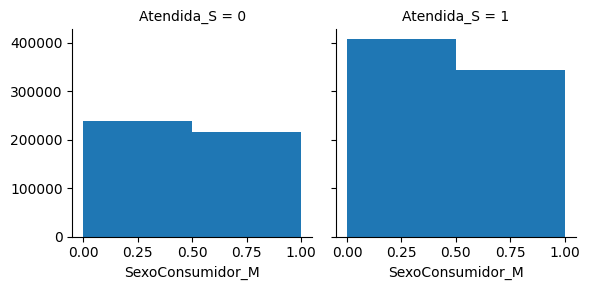

In [19]:
aten = sns.FacetGrid(df_analise1, col='Atendida_S')
aten.map(plt.hist, 'SexoConsumidor_M', bins=2)

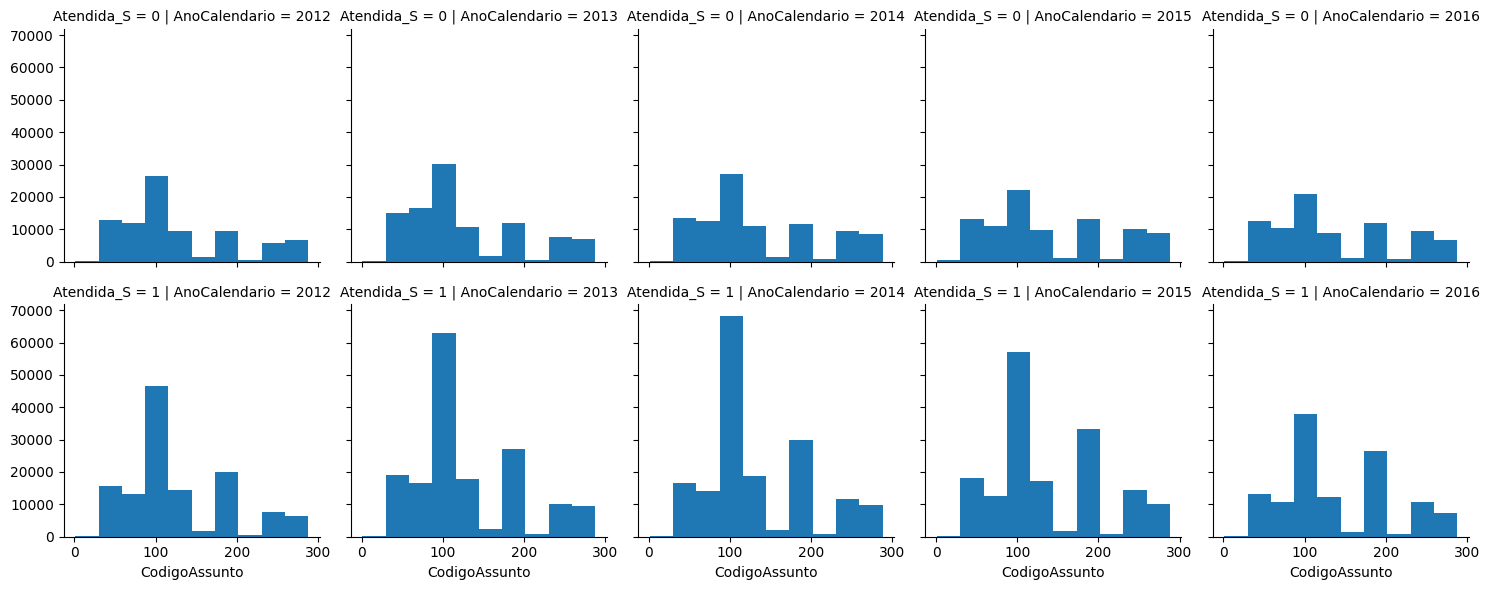

In [20]:
aten = sns.FacetGrid(df_analise2, col='AnoCalendario', row= 'Atendida_S')
aten.map(plt.hist, 'CodigoAssunto', bins=10)

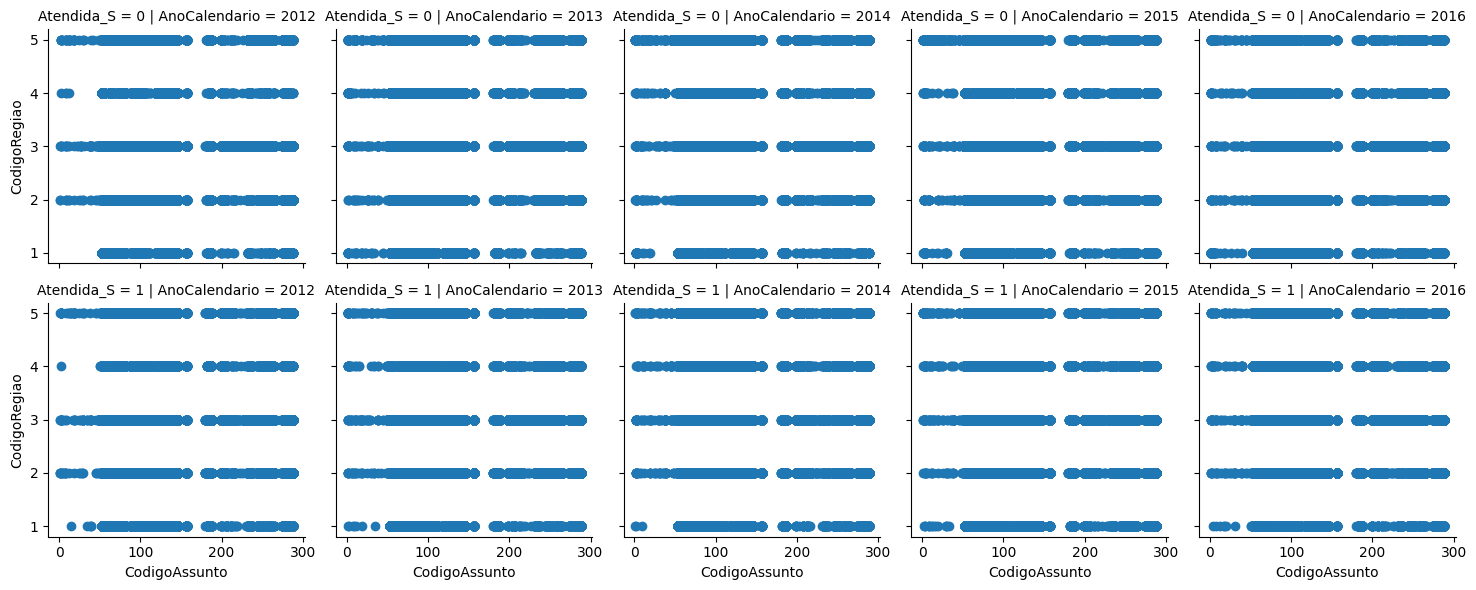

In [21]:
atend = sns.FacetGrid(df_analise2, col='AnoCalendario', row= 'Atendida_S')
atend.map(plt.scatter, 'CodigoAssunto', 'CodigoRegiao')

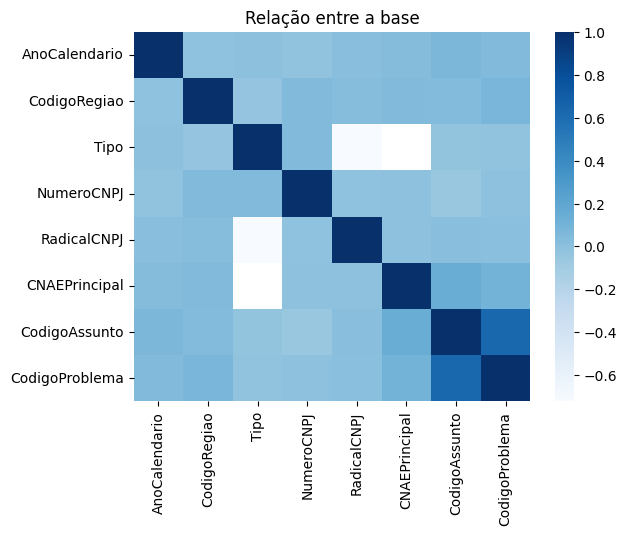

In [22]:
sns.heatmap(df_Main.corr(), 
            annot= False,
            fmt = '.2f', 
            cmap='Blues')
plt.title('Relação entre a base')
plt.show()

#### Analise de texto

In [23]:
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /home/jean/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
df_world = pd.DataFrame(df_Main['DescCNAEPrincipal'].head(100).copy())

In [41]:
df_world.dropna(axis=0, inplace = True)

In [42]:
df_world.info

<bound method DataFrame.info of                                     DescCNAEPrincipal
0   ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...
1   FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...
2    COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES
3           FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA
4   COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...
..                                                ...
95  FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...
96                       FILMAGEM DE FESTAS E EVENTOS
97  FABRICAÇÃO DE FOGÕES, REFRIGERADORES E MÁQUINA...
98  FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...
99         SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC

[97 rows x 1 columns]>

In [45]:
df_world['wordtoken'] = df_world['DescCNAEPrincipal'].apply(word_tokenize)

df = []
for desc in df_world['DescCNAEPrincipal']:
    df.append(desc)



In [47]:
df

['ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE SERVIÇOS E NEGÓCIOS EM GERAL, EXCETO IMOBILIÁRIOS',
 'FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃO, GRAVAÇÃO E AMPLIFICAÇÃO DE ÁUDIO E VÍDEO',
 'COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES',
 'FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA',
 'COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO NÃO ESPECIFICADOS ANTERIORMENTE',
 'ATIVIDADES AUXILIARES DOS SEGUROS, DA PREVIDÊNCIA COMPLEMENTAR E DOS PLANOS DE SAÚDE NÃO ESPECIFICADAS ANTERIORMENTE',
 'COMÉRCIO VAREJISTA DE ARTIGOS ESPORTIVOS',
 'COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL, COM PREDOMINÂNCIA DE PRODUTOS ALIMENTÍCIOS - HIPERMERCADOS',
 'TELEFONIA MÓVEL CELULAR',
 'ARRENDAMENTO MERCANTIL',
 'COMÉRCIO ATACADISTA DE LIVROS, JORNAIS E OUTRAS PUBLICAÇÕES',
 'BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL',
 'FABRICAÇÃO DE APARELHOS TELEFÔNICOS E DE OUTROS EQUIPAMENTOS DE COMUNICAÇÃO, PEÇAS E ACESSÓRIOS',
 'FABRICAÇÃO DE PERIFÉRICOS PARA EQUIPAMENTOS DE INFORMÁTICA',
 'TELEFONIA MÓVEL CELULAR

In [27]:
texto = '''ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE SERVIÇOS E NEGÓCIOS EM GERAL, EXCETO IMOBILIÁRIOS',
       'FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃO, GRAVAÇÃO E AMPLIFICAÇÃO DE ÁUDIO E VÍDEO',
       'COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES',
       'FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA',
       'COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO NÃO ESPECIFICADOS ANTERIORMENTE',
       'ATIVIDADES AUXILIARES DOS SEGUROS, DA PREVIDÊNCIA COMPLEMENTAR E DOS PLANOS DE SAÚDE NÃO ESPECIFICADAS ANTERIORMENTE',
       'COMÉRCIO VAREJISTA DE ARTIGOS ESPORTIVOS',
       'COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL, COM PREDOMINÂNCIA DE PRODUTOS ALIMENTÍCIOS - HIPERMERCADOS',
       'TELEFONIA MÓVEL CELULAR', 'ARRENDAMENTO MERCANTIL',
       'COMÉRCIO ATACADISTA DE LIVROS, JORNAIS E OUTRAS PUBLICAÇÕES',
       'BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL',
       'FABRICAÇÃO DE APARELHOS TELEFÔNICOS E DE OUTROS EQUIPAMENTOS DE COMUNICAÇÃO, PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE PERIFÉRICOS PARA EQUIPAMENTOS DE INFORMÁTICA',
       'COMÉRCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENTOS DE TELEFONIA E COMUNICAÇÃO',
       'COMÉRCIO ATACADISTA DE COMPONENTES ELETRÔNICOS E EQUIPAMENTOS DE TELEFONIA E COMUNICAÇÃO',
       'FABRICAÇÃO DE FOGÕES, REFRIGERADORES E MÁQUINAS DE LAVAR E SECAR PARA USO DOMÉSTICO, PEÇAS E ACESSÓRIOS',
       'SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC',
       'COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉSTICOS E EQUIPAMENTOS DE ÁUDIO E VÍDEO',
       'CORRETAGEM NA COMPRA E VENDA E AVALIAÇÃO DE IMÓVEIS', nan,
       'COMÉRCIO A VAREJO DE AUTOMÓVEIS, CAMIONETAS E UTILITÁRIOS NOVOS',
       'BANCOS COMERCIAIS', 'BANCOS MÚLTIPLOS, SEM CARTEIRA COMERCIAL',
       'PLANOS DE SAÚDE', 'COMÉRCIO VAREJISTA DE CALÇADOS',
       'SOCIEDADES DE CRÉDITO, FINANCIAMENTO E INVESTIMENTO - FINANCEIRAS',
       'GESTÃO E ADMINISTRAÇÃO DA PROPRIEDADE IMOBILIÁRIA',
       'SEGUROS NÃO-VIDA', 'ALUGUEL DE IMÓVEIS PRÓPRIOS',
       'ADMINISTRAÇÃO DE CARTÕES DE CRÉDITO',
       'FABRICAÇÃO DE COMPONENTES ELETRÔNICOS',
       'COMÉRCIO A VAREJO DE AUTOMÓVEIS, CAMIONETAS E UTILITÁRIOS USADOS',
       'LOJAS DE DEPARTAMENTOS OU MAGAZINES',
       'COMÉRCIO VAREJISTA DE OUTROS PRODUTOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'FABRICAÇÃO DE MÓVEIS COM PREDOMINÂNCIA DE MADEIRA',
       'TREINAMENTO EM INFORMÁTICA',
       'FABRICAÇÃO DE PRODUTOS DIVERSOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMÉRCIO VAREJISTA DE PLANTAS E FLORES NATURAIS',
       'ADMINISTRAÇÃO PÚBLICA EM GERAL',
       'DISTRIBUIÇÃO DE ENERGIA ELÉTRICA',
       'COMÉRCIO ATACADISTA DE APARELHOS ELETRÔNICOS DE USO PESSOAL E DOMÉSTICO',
       'REPARAÇÃO E MANUTENÇÃO DE EQUIPAMENTOS ELETROELETRÔNICOS DE USO PESSOAL E DOMÉSTICO',
       'COMÉRCIO ATACADISTA DE EQUIPAMENTOS DE INFORMÁTICA',
       'EDIÇÃO DE LIVROS', 'FILMAGEM DE FESTAS E EVENTOS',
       'COMÉRCIO VAREJISTA DE ARTIGOS DE CAÇA, PESCA E CAMPING',
       'COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL, COM PREDOMINÂNCIA DE PRODUTOS ALIMENTÍCIOS - SUPERMERCADOS',
       'TRANSPORTE AÉREO DE PASSAGEIROS REGULAR',
       'CLUBES SOCIAIS, ESPORTIVOS E SIMILARES',
       'REPARAÇÃO E MANUTENÇÃO DE OUTROS OBJETOS E EQUIPAMENTOS PESSOAIS E DOMÉSTICOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMÉRCIO VAREJISTA DE MÓVEIS',
       'COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO EM GERAL',
       'COMÉRCIO VAREJISTA DE ARTIGOS FOTOGRÁFICOS E PARA FILMAGEM',
       'ADMINISTRAÇÃO DE CONSÓRCIOS PARA AQUISIÇÃO DE BENS E DIREITOS',
       'FABRICAÇÃO DE AUTOMÓVEIS, CAMIONETAS E UTILITÁRIOS',
       'AGÊNCIAS DE VIAGENS', 'TELECOMUNICAÇÕES POR SATÉLITE',
       'ATIVIDADES DE ORGANIZAÇÕES SINDICAIS',
       'ATIVIDADES DE TELEATENDIMENTO',
       'ATIVIDADES DE PSICOLOGIA E PSICANÁLISE',
       'PREPARAÇÃO E FIAÇÃO DE FIBRAS DE ALGODÃO',
       'OPERADORAS DE TELEVISÃO POR ASSINATURA POR CABO',
       'CAIXAS ECONÔMICAS',
       'SERVIÇOS COMBINADOS DE ESCRITÓRIO E APOIO ADMINISTRATIVO',
       'SERVIÇOS DE TELECOMUNICAÇÕES SEM FIO NÃO ESPECIFICADOS ANTERIORMENTE',
       'EDIÇÃO INTEGRADA À IMPRESSÃO DE REVISTAS',
       'COMÉRCIO VAREJISTA DE ARTIGOS DO VESTUÁRIO E ACESSÓRIOS',
       'OUTRAS ATIVIDADES AUXILIARES DOS SERVIÇOS FINANCEIROS NÃO ESPECIFICADAS ANTERIORMENTE',
       'OUTRAS ATIVIDADES DE RECREAÇÃO E LAZER NÃO ESPECIFICADAS ANTERIORMENTE',
       'CURSOS PREPARATÓRIOS PARA CONCURSOS',
       'PREPARAÇÃO DE DOCUMENTOS E SERVIÇOS ESPECIALIZADOS DE APOIO ADMINISTRATIVO NÃO ESPECIFICADOS ANTERIORMENTE',
       'ATIVIDADE ODONTOLÓGICA COM RECURSOS PARA REALIZAÇÃO DE PROCEDIMENTOS CIRÚRGICOS',
       'REPARAÇÃO E MANUTENÇÃO DE COMPUTADORES E DE EQUIPAMENTOS PERIFÉRICOS',
       'FABRICAÇÃO DE OUTROS PRODUTOS ALIMENTÍCIOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMÉRCIO VAREJISTA ESPECIALIZADO DE PEÇAS E ACESSÓRIOS PARA APARELHOS ELETROELETRÔNICOS PARA USO DOMÉSTICO, EXCETO INFORMÁTICA E COMUNICAÇÃO',
       'IMPRESSÃO DE LIVROS, REVISTAS E OUTRAS PUBLICAÇÕES PERIÓDICAS',
       'ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITOS SOCIAIS',
       'INCORPORAÇÃO DE EMPREENDIMENTOS IMOBILIÁRIOS',
       'FORMAÇÃO DE CONDUTORES', 'FABRICAÇÃO DE COLCHÕES',
       'COMÉRCIO ATACADISTA DE OUTROS EQUIPAMENTOS E ARTIGOS DE USO PESSOAL E DOMÉSTICO NÃO ESPECIFICADOS ANTERIORMENTE',
       'SERVIÇOS ADVOCATÍCIOS', 'EDUCAÇÃO SUPERIOR - GRADUAÇÃO',
       'COMÉRCIO VAREJISTA DE ARTIGOS DE PAPELARIA',
       'FABRICAÇÃO DE MÓVEIS COM PREDOMINÂNCIA DE METAL',
       'ATIVIDADES DO CORREIO NACIONAL',
       'LOCAÇÃO DE AUTOMÓVEIS SEM CONDUTOR', 'SEGUROS DE VIDA',
       'OUTRAS ATIVIDADES DE ATENÇÃO À SAÚDE HUMANA NÃO ESPECIFICADAS ANTERIORMENTE',
       'PROGRAMADORAS',
       'SUPORTE TÉCNICO, MANUTENÇÃO E OUTROS SERVIÇOS EM TECNOLOGIA DA INFORMAÇÃO',
       'FABRICAÇÃO DE ESQUADRIAS DE METAL',
       'TRANSPORTE RODOVIÁRIO DE CARGA, EXCETO PRODUTOS PERIGOSOS E MUDANÇAS, INTERMUNICIPAL, INTERESTADUAL E INTERNACIONAL',
       'CAPTAÇÃO, TRATAMENTO E DISTRIBUIÇÃO DE ÁGUA',
       'PREVIDÊNCIA COMPLEMENTAR FECHADA',
       'COMÉRCIO POR ATACADO DE PEÇAS E ACESSÓRIOS NOVOS PARA VEÍCULOS AUTOMOTORES',
       'COMÉRCIO ATACADISTA DE MERCADORIAS EM GERAL, SEM PREDOMINÂNCIA DE ALIMENTOS OU DE INSUMOS AGROPECUÁRIOS',
       'FABRICAÇÃO DE EQUIPAMENTOS TRANSMISSORES DE COMUNICAÇÃO, PEÇAS E ACESSÓRIOS',
       'COMÉRCIO VAREJISTA DE PRODUTOS SANEANTES DOMISSANITÁRIOS',
       'SERVIÇOS DE TELECOMUNICAÇÕES POR FIO NÃO ESPECIFICADOS ANTERIORMENTE',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA USO GERAL NÃO ESPECIFICADOS ANTERIORMENTE',
       'OUTRAS ATIVIDADES DE SERVIÇOS PESSOAIS NÃO ESPECIFICADAS ANTERIORMENTE',
       'ATIVIDADES DE CONSULTORIA EM GESTÃO EMPRESARIAL, EXCETO CONSULTORIA TÉCNICA ESPECÍFICA',
       'EDIÇÃO INTEGRADA À IMPRESSÃO DE JORNAIS',
       'PORTAIS, PROVEDORES DE CONTEÚDO E OUTROS SERVIÇOS DE INFORMAÇÃO NA INTERNET',
       'COMÉRCIO VAREJISTA DE ARTIGOS DE VIAGEM',
       'ATIVIDADE MÉDICA AMBULATORIAL COM RECURSOS PARA REALIZAÇÃO DE PROCEDIMENTOS CIRÚRGICOS',
       'COMÉRCIO VAREJISTA DE ARTIGOS DE COLCHOARIA',
       'FABRICAÇÃO DE APARELHOS E EQUIPAMENTOS DE AR CONDICIONADO PARA USO NÃO-INDUSTRIAL',
       'COMÉRCIO A VAREJO DE PEÇAS E ACESSÓRIOS NOVOS PARA VEÍCULOS AUTOMOTORES',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS E APARELHOS DE REFRIGERAÇÃO E VENTILAÇÃO PARA USO INDUSTRIAL E COMERCIAL',
       'TRANSPORTE RODOVIÁRIO DE MUDANÇAS',
       'COMÉRCIO VAREJISTA DE VIDROS', 'PREVIDÊNCIA COMPLEMENTAR ABERTA',
       'FUNDOS DE INVESTIMENTO, EXCETO PREVIDENCIÁRIOS E IMOBILIÁRIOS',
       'COOPERATIVAS DE CRÉDITO MÚTUO',
       'COMÉRCIO ATACADISTA DE MÓVEIS E ARTIGOS DE COLCHOARIA',
       'CONSTRUÇÃO DE EDIFÍCIOS', 'EDIÇÃO DE REVISTAS', 'CHAVEIROS',
       'OUTROS REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO ESPECIALIZADO EM PRODUTOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'ATIVIDADES DE COBRANÇA E INFORMAÇÕES CADASTRAIS',
       'FABRICAÇÃO DE MÁQUINAS E APARELHOS DE REFRIGERAÇÃO E VENTILAÇÃO PARA USO INDUSTRIAL E COMERCIAL, PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE OUTROS APARELHOS ELETRODOMÉSTICOS NÃO ESPECIFICADOS ANTERIORMENTE, PEÇAS E ACESSÓRIOS',
       'FORNECIMENTO DE ALIMENTOS PREPARADOS PREPONDERANTEMENTE PARA CONSUMO DOMICILIAR',
       'HOLDINGS DE INSTITUIÇÕES NÃO-FINANCEIRAS',
       'OUTROS ALOJAMENTOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMÉRCIO VAREJISTA DE PRODUTOS ALIMENTÍCIOS EM GERAL OU ESPECIALIZADO EM PRODUTOS ALIMENTÍCIOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'EDUCAÇÃO INFANTIL - PRÉ-ESCOLA',
       'COMÉRCIO A VAREJO DE PEÇAS E ACESSÓRIOS PARA MOTOCICLETAS E MOTONETAS',
       'OPERADORES TURÍSTICOS', 'SOCIEDADES DE CRÉDITO IMOBILIÁRIO',
       'OUTRAS ATIVIDADES DE TELECOMUNICAÇÕES NÃO ESPECIFICADAS ANTERIORMENTE',
       'ENSINO MÉDIO', 'SEGUROS-SAÚDE',
       'OBRAS DE ACABAMENTO EM GESSO E ESTUQUE',
       'SECURITIZAÇÃO DE CRÉDITOS',
       'EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO',
       'COMÉRCIO ATACADISTA DE EQUIPAMENTOS ELÉTRICOS DE USO PESSOAL E DOMÉSTICO',
       'IMPERMEABILIZAÇÃO EM OBRAS DE ENGENHARIA CIVIL',
       'COMÉRCIO VAREJISTA DE COMBUSTÍVEIS PARA VEÍCULOS AUTOMOTORES',
       'COMÉRCIO VAREJISTA DE LIVROS',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS, APARELHOS E MATERIAIS ELÉTRICOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMÉRCIO VAREJISTA DE FERRAGENS E FERRAMENTAS',
       'SOCIEDADES DE FOMENTO MERCANTIL - FACTORING',
       'FABRICAÇÃO DE OUTROS EQUIPAMENTOS E APARELHOS ELÉTRICOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMERCIO VAREJISTA DE ARTIGOS DE CAMA, MESA E BANHO',
       'PROVEDORES DE ACESSO ÀS REDES DE COMUNICAÇÕES',
       'FABRICAÇÃO DE AZULEJOS E PISOS',
       'OUTRAS ATIVIDADES DE SERVIÇOS PRESTADOS PRINCIPALMENTE ÀS EMPRESAS NÃO ESPECIFICADAS ANTERIORMENTE',
       'COMÉRCIO VAREJISTA DE EQUIPAMENTOS PARA ESCRITÓRIO',
       'COMÉRCIO ATACADISTA ESPECIALIZADO EM OUTROS PRODUTOS INTERMEDIÁRIOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMÉRCIO POR ATACADO DE MOTOCICLETAS E MOTONETAS',
       'SERVIÇOS DE TRADUÇÃO, INTERPRETAÇÃO E SIMILARES',
       'CORRETAGEM NO ALUGUEL DE IMÓVEIS', 'ENSINO FUNDAMENTAL',
       'GESTÃO E MANUTENÇÃO DE CEMITÉRIOS',
       'TREINAMENTO EM DESENVOLVIMENTO PROFISSIONAL E GERENCIAL',
       'SERVIÇO MÓVEL ESPECIALIZADO - SME', 'HOTÉIS',
       'COMÉRCIO VAREJISTA DE ARTIGOS DE ÓPTICA',
       'COMERCIO VAREJISTA DE ARTIGOS DE ARMARINHO',
       'COMÉRCIO VAREJISTA DE ARTIGOS DE JOALHERIA',
       'COMÉRCIO A VAREJO DE MOTOCICLETAS E MOTONETAS NOVAS',
       'EDUCAÇÃO PROFISSIONAL DE NÍVEL TÉCNICO',
       'LABORATÓRIOS FOTOGRÁFICOS',
       'FABRICAÇÃO DE BICICLETAS E TRICICLOS NÃO-MOTORIZADOS, PEÇAS E ACESSÓRIOS',
       'REPARAÇÃO E MANUTENÇÃO DE EQUIPAMENTOS DE COMUNICAÇÃO',
       'COMÉRCIO VAREJISTA DE ARTIGOS DE RELOJOARIA',
       'HOLDINGS DE INSTITUIÇÕES FINANCEIRAS',
       'COMÉRCIO VAREJISTA ESPECIALIZADO DE INSTRUMENTOS MUSICAIS E ACESSÓRIOS',
       'OUTRAS SOCIEDADES DE PARTICIPAÇÃO, EXCETO HOLDINGS',
       'FABRICAÇÃO DE EQUIPAMENTOS E ACESSÓRIOS PARA SEGURANÇA PESSOAL E PROFISSIONAL',
       'FABRICAÇÃO DE COMPRESSORES PARA USO INDUSTRIAL, PEÇAS E ACESSÓRIOS',
       'COMÉRCIO SOB CONSIGNAÇÃO DE MOTOCICLETAS E MOTONETAS',
       'PRODUÇÃO DE FILMES PARA PUBLICIDADE',
       'COMÉRCIO ATACADISTA DE COSMÉTICOS E PRODUTOS DE PERFUMARIA',
       'ORGANIZAÇÃO LOGÍSTICA DO TRANSPORTE DE CARGA',
       'SERVIÇOS DE COMUNICAÇÃO MULTIMÍDIA - SCM',
       'ATIVIDADES DE ATENDIMENTO EM PRONTO-SOCORRO E UNIDADES HOSPITALARES PARA ATENDIMENTO A URGÊNCIAS',
       'ARMAZÉNS GERAIS - EMISSÃO DE WARRANT',
       'ATIVIDADES DE ORGANIZAÇÕES ASSOCIATIVAS PATRONAIS E EMPRESARIAIS',
       'INSTALAÇÃO E MANUTENÇÃO DE SISTEMAS CENTRAIS DE AR CONDICIONADO, DE VENTILAÇÃO E REFRIGERAÇÃO',
       'ENSINO DE IDIOMAS', 'SERVIÇOS DE FUNERÁRIAS',
       'COMÉRCIO VAREJISTA DE BRINQUEDOS E ARTIGOS RECREATIVOS',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE VEÍCULOS AUTOMOTORES',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE MERCADORIAS EM GERAL NÃO ESPECIALIZADO',
       'CORRETORES E AGENTES DE SEGUROS, DE PLANOS DE PREVIDÊNCIA COMPLEMENTAR E DE SAÚDE',
       'GUARDA-MÓVEIS',
       'COMÉRCIO POR ATACADO DE AUTOMÓVEIS, CAMIONETAS E UTILITÁRIOS NOVOS E USADOS',
       'COMÉRCIO ATACADISTA DE CALÇADOS', 'OBRAS DE TERRAPLENAGEM',
       'RESTAURANTES E SIMILARES',
       'FABRICAÇÃO DE ARTEFATOS DE MATERIAL PLÁSTICO PARA USO PESSOAL E DOMÉSTICO',
       'COMÉRCIO VAREJISTA DE JORNAIS E REVISTAS',
       'FABRICAÇÃO DE MATERIAIS PARA MEDICINA E ODONTOLOGIA',
       'COMÉRCIO ATACADISTA DE CERVEJA, CHOPE E REFRIGERANTE',
       'ALUGUEL DE OBJETOS DO VESTUÁRIO, JÓIAS E ACESSÓRIOS',
       'OPERADORAS DE TELEVISÃO POR ASSINATURA POR SATÉLITE',
       'SERVIÇOS DE MONTAGEM DE MÓVEIS DE QUALQUER MATERIAL',
       'SERVIÇOS DE MANUTENÇÃO E REPARAÇÃO MECÂNICA DE VEÍCULOS AUTOMOTORES',
       'LABORATÓRIOS CLÍNICOS',
       'TRATAMENTO DE DADOS, PROVEDORES DE SERVIÇOS DE APLICAÇÃO E SERVIÇOS DE HOSPEDAGEM NA INTERNET',
       'COMPRA E VENDA DE IMÓVEIS PRÓPRIOS',
       'COMÉRCIO VAREJISTA DE DOCES, BALAS, BOMBONS E SEMELHANTES',
       'FABRICAÇÃO DE ESTRUTURAS METÁLICAS',
       'COMÉRCIO VAREJISTA DE ARTIGOS DE TAPEÇARIA, CORTINAS E PERSIANAS',
       'COMÉRCIO VAREJISTA DE OUTROS ARTIGOS DE USO DOMÉSTICO NÃO ESPECIFICADOS ANTERIORMENTE',
       'CONFECÇÃO DE PEÇAS DO VESTUÁRIO, EXCETO ROUPAS ÍNTIMAS E AS CONFECCIONADAS SOB MEDIDA',
       'LOJAS DE VARIEDADES, EXCETO LOJAS DE DEPARTAMENTOS OU MAGAZINES',
       'COMÉRCIO A VAREJO DE MOTOCICLETAS E MOTONETAS USADAS',
       'ATIVIDADES ASSOCIATIVAS NÃO ESPECIFICADAS ANTERIORMENTE',
       'EXPLORAÇÃO DE JOGOS ELETRÔNICOS RECREATIVOS',
       'COMÉRCIO ATACADISTA DE JÓIAS, RELÓGIOS E BIJUTERIAS, INCLUSIVE PEDRAS PRECIOSAS E SEMIPRECIOSAS LAPIDADAS',
       'CONFECÇÃO, SOB MEDIDA, DE PEÇAS DO VESTUÁRIO, EXCETO ROUPAS ÍNTIMAS',
       'COMÉRCIO VAREJISTA DE TECIDOS',
       'FABRICAÇÃO DE ARTEFATOS DE CIMENTO PARA USO NA CONSTRUÇÃO',
       'COMÉRCIO ATACADISTA DE MATERIAIS DE CONSTRUÇÃO EM GERAL',
       'COMÉRCIO VAREJISTA DE PRODUTOS FARMACÊUTICOS, SEM MANIPULAÇÃO DE FÓRMULAS',
       'TRANSPORTE RODOVIÁRIO DE CARGA, EXCETO PRODUTOS PERIGOSOS E MUDANÇAS, MUNICIPAL',
       'COMÉRCIO VAREJISTA DE COSMÉTICOS, PRODUTOS DE PERFUMARIA E DE HIGIENE PESSOAL',
       'COMÉRCIO VAREJISTA DE BICICLETAS E TRICICLOS PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE TÊNIS DE QUALQUER MATERIAL',
       'FABRICAÇÃO DE ARTIGOS DE SERRALHERIA, EXCETO ESQUADRIAS',
       'OPERADORAS DE TELEVISÃO POR ASSINATURA POR MICROONDAS',
       'PRODUÇÃO DE LAMINADOS DE ALUMÍNIO',
       'OUTRAS ATIVIDADES DE TRATAMENTO DE BELEZA',
       'FABRICAÇÃO DE PEÇAS E ACESSÓRIOS PARA O SISTEMA MOTOR DE VEÍCULOS AUTOMOTORES',
       'COMÉRCIO ATACADISTA DE OUTRAS MÁQUINAS E EQUIPAMENTOS NÃO ESPECIFICADOS ANTERIORMENTE PARTES E PEÇAS',
       'SERVIÇOS DE RESERVAS E OUTROS SERVIÇOS DE TURISMO NÃO ESPECIFICADOS ANTERIORMENTE',
       'ATIVIDADES DE CONDICIONAMENTO FÍSICO',
       'FABRICAÇÃO DE CALÇADOS DE COURO',
       'OUTRAS OBRAS DE ACABAMENTO DA CONSTRUÇÃO',
       'COMÉRCIO ATACADISTA DE CEREAIS E LEGUMINOSAS BENEFICIADOS, FARINHAS, AMIDOS E FÉCULAS, COM ATIVIDADE DE FRACIONAMENTO E ACONDICIONAMENTO ASSOCIADA',
       'FABRICAÇÃO DE MATERIAL ELÉTRICO E ELETRÔNICO PARA VEÍCULOS AUTOMOTORES, EXCETO BATERIAS',
       'INSTALAÇÃO DE MÁQUINAS E EQUIPAMENTOS INDUSTRIAIS',
       'DESENVOLVIMENTO DE PROGRAMAS DE COMPUTADOR SOB ENCOMENDA',
       'EDUCAÇÃO SUPERIOR - PÓS-GRADUAÇÃO E EXTENSÃO',
       'FABRICAÇÃO DE OUTROS BRINQUEDOS E JOGOS RECREATIVOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE TÊXTEIS, VESTUÁRIO, CALÇADOS E ARTIGOS DE VIAGEM',
       'COMÉRCIO VAREJISTA DE SUVENIRES, BIJUTERIAS E ARTESANATOS',
       'FABRICAÇÃO DE MÓVEIS DE OUTROS MATERIAIS, EXCETO MADEIRA E METAL',
       'CABELEIREIROS', 'SEGURANÇA E ORDEM PÚBLICA',
       'SERVIÇOS DE ENGENHARIA',
       'PRODUÇÃO DE ARTEFATOS ESTAMPADOS DE METAL',
       'TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS, COM ITINERÁRIO FIXO, MUNICIPAL',
       'REPRODUÇÃO DE SOM EM QUALQUER SUPORTE',
       'FABRICAÇÃO DE ARTEFATOS PARA PESCA E ESPORTE',
       'FABRICAÇÃO DE APARELHOS E EQUIPAMENTOS DE MEDIDA, TESTE E CONTROLE',
       'ATIVIDADES DE ATENDIMENTO HOSPITALAR, EXCETO PRONTO-SOCORRO E UNIDADES PARA ATENDIMENTO A URGÊNCIAS',
       'COMÉRCIO ATACADISTA DE PRODUTOS ALIMENTÍCIOS EM GERAL',
       'COMÉRCIO ATACADISTA DE OUTROS PRODUTOS QUÍMICOS E PETROQUÍMICOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMÉRCIO ATACADISTA DE MÁQUINAS E EQUIPAMENTOS PARA USO COMERCIAL PARTES E PEÇAS',
       'ATIVIDADES TÉCNICAS RELACIONADAS À ENGENHARIA E ARQUITETURA NÃO ESPECIFICADAS ANTERIORMENTE',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE ELETRODOMÉSTICOS, MÓVEIS E ARTIGOS DE USO DOMÉSTICO',
       'FABRICAÇÃO DE OUTROS ARTIGOS DE CARPINTARIA PARA CONSTRUÇÃO',
       'COMÉRCIO VAREJISTA DE ARTIGOS MÉDICOS E ORTOPÉDICOS',
       'ALUGUEL DE MÓVEIS, UTENSÍLIOS E APARELHOS DE USO DOMÉSTICO E PESSOAL INSTRUMENTOS MUSICAIS',
       'TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS, COM ITINERÁRIO FIXO, INTERESTADUAL',
       'ATIVIDADES DE MONITORAMENTO DE SISTEMAS DE SEGURANÇA',
       'SERVIÇOS DE MALOTE NÃO REALIZADOS PELO CORREIO NACIONAL',
       'EDIÇÃO INTEGRADA À IMPRESSÃO DE CADASTROS, LISTAS E OUTROS PRODUTOS GRÁFICOS',
       'ALUGUEL DE FITAS DE VÍDEO, DVDS E SIMILARES',
       'COMÉRCIO ATACADISTA DE FILMES, CDS, DVDS, FITAS E DISCOS',
       'COMPANHIAS HIPOTECÁRIAS',
       'SOCIEDADES DE CRÉDITO AO MICROEMPREENDEDOR',
       'PARQUES DE DIVERSÃO E PARQUES TEMÁTICOS',
       'OUTRAS ATIVIDADES DE ENSINO NÃO ESPECIFICADAS ANTERIORMENTE',
       'SERVIÇOS DE BORRACHARIA PARA VEÍCULOS AUTOMOTORES',
       'CASAS DE FESTAS E EVENTOS',
       'COMÉRCIO VAREJISTA DE MATERIAL ELÉTRICO',
       'FABRICAÇÃO DE OUTRAS MÁQUINAS E EQUIPAMENTOS DE USO GERAL NÃO ESPECIFICADOS ANTERIORMENTE, PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE CRONÔMETROS E RELÓGIOS',
       'ATIVIDADES DE ORGANIZAÇÕES RELIGIOSAS',
       'ATIVIDADES DE PROFISSIONAIS DA ÁREA DE SAÚDE NÃO ESPECIFICADAS ANTERIORMENTE',
       'COMÉRCIO ATACADISTA DE ARTIGOS DE ESCRITÓRIO E DE PAPELARIA',
       'TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS, COM ITINERÁRIO FIXO, INTERMUNICIPAL, EXCETO EM REGIÃO METROPOLITANA',
       'FABRICAÇÃO DE ARTIGOS DE METAL PARA USO DOMÉSTICO E PESSOAL',
       'COMÉRCIO VAREJISTA DE DISCOS, CDS, DVDS E FITAS',
       'SERVIÇOS DE ORGANIZAÇÃO DE FEIRAS, CONGRESSOS, EXPOSIÇÕES E FESTAS',
       'BENEFICIAMENTO DE ARROZ', 'SEGURIDADE SOCIAL OBRIGATÓRIA',
       'CONSTRUÇÃO DE INSTALAÇÕES ESPORTIVAS E RECREATIVAS',
       'ESTACIONAMENTO DE VEÍCULOS',
       'FABRICAÇÃO DE APARELHOS E EQUIPAMENTOS PARA DISTRIBUIÇÃO E CONTROLE DE ENERGIA ELÉTRICA',
       'AGÊNCIAS DE PUBLICIDADE', 'SERVIÇOS DE PRÉ-IMPRESSÃO',
       'TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS, COM ITINERÁRIO FIXO, INTERMUNICIPAL EM REGIÃO METROPOLITANA',
       'LAVANDERIAS',
       'FABRICAÇÃO DE TECIDOS ESPECIAIS, INCLUSIVE ARTEFATOS',
       'COMÉRCIO ATACADISTA DE BOMBAS E COMPRESSORES PARTES E PEÇAS',
       'FABRICAÇÃO DE MATERIAL ELÉTRICO PARA INSTALAÇÕES EM CIRCUITO DE CONSUMO',
       'FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA AS INDÚSTRIAS DE ALIMENTOS, BEBIDAS E FUMO, PEÇAS E ACESSÓRIOS',
       'SELEÇÃO E AGENCIAMENTO DE MÃO-DE-OBRA',
       'PESQUISA E DESENVOLVIMENTO EXPERIMENTAL EM CIÊNCIAS SOCIAIS E HUMANAS',
       'EDUCAÇÃO PROFISSIONAL DE NÍVEL TECNOLÓGICO',
       'COMÉRCIO ATACADISTA DE INSTRUMENTOS E MATERIAIS PARA USO MÉDICO, CIRÚRGICO, HOSPITALAR E DE LABORATÓRIOS',
       'COMÉRCIO ATACADISTA DE BICICLETAS, TRICICLOS E OUTROS VEÍCULOS RECREATIVOS',
       'SERVIÇOS DE ASSISTÊNCIA SOCIAL SEM ALOJAMENTO',
       'PRODUÇÃO DE GÁS PROCESSAMENTO DE GÁS NATURAL',
       'FABRICAÇÃO DE APARELHOS ELÉTRICOS DE USO PESSOAL, PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE LETRAS, LETREIROS E PLACAS DE QUALQUER MATERIAL, EXCETO LUMINOSOS',
       'FABRICAÇÃO DE PILHAS, BATERIAS E ACUMULADORES ELÉTRICOS, EXCETO PARA VEÍCULOS AUTOMOTORES',
       'FABRICAÇÃO DE ARTEFATOS DE MATERIAL PLÁSTICO PARA OUTROS USOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'FABRICAÇÃO DE APARELHOS FOTOGRÁFICOS E CINEMATOGRÁFICOS, PEÇAS E ACESSÓRIOS',
       'REFORMA DE PNEUMÁTICOS USADOS', 'ATIVIDADES DE ENFERMAGEM',
       'OUTRAS OBRAS DE ENGENHARIA CIVIL NÃO ESPECIFICADAS ANTERIORMENTE',
       'FABRICAÇÃO DE ARTIGOS DE VIDRO', 'TORREFAÇÃO E MOAGEM DE CAFÉ',
       'ADMINISTRAÇÃO DE OBRAS',
       'COMÉRCIO A VAREJO DE PEÇAS E ACESSÓRIOS USADOS PARA VEÍCULOS AUTOMOTORES',
       'MARKETING DIRETO',
       'COMÉRCIO POR ATACADO DE PNEUMÁTICOS E CÂMARAS-DE-AR',
       'FABRICAÇÃO DE COSMÉTICOS, PRODUTOS DE PERFUMARIA E DE HIGIENE PESSOAL',
       'FABRICAÇÃO DE ARTEFATOS DE CERÂMICA E BARRO COZIDO PARA USO NA CONSTRUÇÃO, EXCETO AZULEJOS E PISOS',
       'COMÉRCIO VAREJISTA DE TINTAS E MATERIAIS PARA PINTURA',
       'FABRICAÇÃO DE BANCOS E ESTOFADOS PARA VEÍCULOS AUTOMOTORES',
       'SERVIÇOS DE ALIMENTAÇÃO PARA EVENTOS E RECEPÇÕES - BUFÊ',
       'APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHOS EM MÁRMORE, GRANITO, ARDÓSIA E OUTRAS PEDRAS',
       'SOCIEDADES DE CAPITALIZAÇÃO',
       'COMÉRCIO VAREJISTA DE ANIMAIS VIVOS E DE ARTIGOS E ALIMENTOS PARA ANIMAIS DE ESTIMAÇÃO',
       'COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL, COM PREDOMINÂNCIA DE PRODUTOS ALIMENTÍCIOS - MINIMERCADOS, MERCEARIAS E ARMAZÉNS',
       'ARTES CÊNICAS, ESPETÁCULOS E ATIVIDADES COMPLEMENTARES NÃO ESPECIFICADOS ANTERIORMENTE',
       'EDIÇÃO DE CADASTROS, LISTAS E OUTROS PRODUTOS GRÁFICOS',
       'COMÉRCIO POR ATACADO DE CAMINHÕES NOVOS E USADOS',
       'CONSULTORIA EM TECNOLOGIA DA INFORMAÇÃO',
       'FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA A AGRICULTURA E PECUÁRIA, PEÇAS E ACESSÓRIOS, EXCETO PARA IRRIGAÇÃO',
       'FABRICAÇÃO DE LATICÍNIOS',
       'CORRESPONDENTES DE INSTITUIÇÕES FINANCEIRAS',
       'IMUNIZAÇÃO E CONTROLE DE PRAGAS URBANAS', 'FOTOCÓPIAS',
       'CASAS LOTÉRICAS',
       'FABRICAÇÃO DE EQUIPAMENTOS PARA SINALIZAÇÃO E ALARME',
       'INSTALAÇÃO E MANUTENÇÃO ELÉTRICA',
       'COMÉRCIO ATACADISTA DE FERRAGENS E FERRAMENTAS',
       'COMÉRCIO ATACADISTA DE SUPRIMENTOS PARA INFORMÁTICA',
       'OUTRAS ATIVIDADES DE PRESTAÇÃO DE SERVIÇOS DE INFORMAÇÃO NÃO ESPECIFICADAS ANTERIORMENTE',
       'FABRICAÇÃO DE PAINÉIS E LETREIROS LUMINOSOS',
       'COMÉRCIO VAREJISTA DE MADEIRA E ARTEFATOS',
       'FABRICAÇÃO DE OUTROS PRODUTOS DE METAL NÃO ESPECIFICADOS ANTERIORMENTE',
       'APART-HOTÉIS',
       'ATIVIDADES DE PRODUÇÃO DE FOTOGRAFIAS, EXCETO AÉREA E SUBMARINA',
       'LOCAÇÃO DE OUTROS MEIOS DE TRANSPORTE NÃO ESPECIFICADOS ANTERIORMENTE, SEM CONDUTOR',
       'COMÉRCIO A VAREJO DE PNEUMÁTICOS E CÂMARAS-DE-AR',
       'BANCOS DE INVESTIMENTO',
       'ATIVIDADES DE ASSISTÊNCIA SOCIAL PRESTADAS EM RESIDÊNCIAS COLETIVAS E PARTICULARES NÃO ESPECIFICADAS ANTERIORMENTE',
       'REPARAÇÃO DE RELÓGIOS',
       'MANUTENÇÃO E REPARAÇÃO DE EQUIPAMENTOS E PRODUTOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'CONDOMÍNIOS PREDIAIS',
       'FABRICAÇÃO DE OUTRAS PEÇAS E ACESSÓRIOS PARA VEÍCULOS AUTOMOTORES NÃO ESPECIFICADAS ANTERIORMENTE',
       'SERVIÇOS DE REBOQUE DE VEÍCULOS',
       'FABRICAÇÃO DE PNEUMÁTICOS E DE CÂMARAS-DE-AR', 'PRODUÇÃO TEATRAL',
       'OUTRAS ATIVIDADES DE SERVIÇOS FINANCEIROS NÃO ESPECIFICADAS ANTERIORMENTE',
       'COMÉRCIO POR ATACADO DE PEÇAS E ACESSÓRIOS PARA MOTOCICLETAS E MOTONETAS',
       'ATIVIDADE MÉDICA AMBULATORIAL RESTRITA A CONSULTAS',
       'FABRICAÇÃO DE PRODUTOS DERIVADOS DO CACAU E DE CHOCOLATES',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS MOTRIZES NÃO-ELÉTRICAS',
       'ATIVIDADES DE APOIO À EDUCAÇÃO, EXCETO CAIXAS ESCOLARES',
       'ATIVIDADES DE CONSULTORIA E AUDITORIA CONTÁBIL E TRIBUTÁRIA',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE MÁQUINAS, EQUIPAMENTOS, EMBARCAÇÕES E AERONAVES',
       'DESENVOLVIMENTO E LICENCIAMENTO DE PROGRAMAS DE COMPUTADOR NÃO-CUSTOMIZÁVEIS',
       'COMÉRCIO ATACADISTA DE MÁQUINAS E EQUIPAMENTOS PARA USO INDUSTRIAL PARTES E PEÇAS',
       'PRODUÇÃO E PROMOÇÃO DE EVENTOS ESPORTIVOS',
       'COMÉRCIO ATACADISTA DE GÁS LIQÜEFEITO DE PETRÓLEO (GLP)',
       'CONFECÇÃO, SOB MEDIDA, DE ROUPAS PROFISSIONAIS',
       'COMÉRCIO ATACADISTA DE MÁQUINAS, APARELHOS E EQUIPAMENTOS PARA USO AGROPECUÁRIO PARTES E PEÇAS',
       'COMÉRCIO ATACADISTA DE SEMENTES, FLORES, PLANTAS E GRAMAS',
       'SERVIÇOS DE ENTREGA RÁPIDA', 'REPARAÇÃO DE ARTIGOS DO MOBILIÁRIO',
       'GESTÃO DE ATIVOS INTANGÍVEIS NÃO-FINANCEIROS',
       'ORGANIZAÇÃO DE EXCURSÕES EM VEÍCULOS RODOVIÁRIOS PRÓPRIOS, INTERMUNICIPAL, INTERESTADUAL E INTERNACIONAL',
       'FABRICAÇÃO DE FERRAMENTAS',
       'COMÉRCIO VAREJISTA DE MATERIAIS HIDRÁULICOS',
       'PERFURAÇÃO E CONSTRUÇÃO DE POÇOS DE ÁGUA',
       'SERVIÇOS DE INSTALAÇÃO, MANUTENÇÃO E REPARAÇÃO DE ACESSÓRIOS PARA VEÍCULOS AUTOMOTORES',
       'ATIVIDADES RELACIONADAS A ESGOTO, EXCETO A GESTÃO DE REDES',
       'FABRICAÇÃO DE CABINES, CARROCERIAS E REBOQUES PARA OUTROS VEÍCULOS AUTOMOTORES, EXCETO CAMINHÕES E ÔNIBUS',
       'ATIVIDADES DE EXIBIÇÃO CINEMATOGRÁFICA',
       'FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA AS INDÚSTRIAS DO VESTUÁRIO, DO COURO E DE CALÇADOS, PEÇAS E ACESSÓRIOS',
       'SERVIÇOS DE LANTERNAGEM OU FUNILARIA E PINTURA DE VEÍCULOS AUTOMOTORES',
       'COMÉRCIO ATACADISTA DE MERCADORIAS EM GERAL, COM PREDOMINÂNCIA DE PRODUTOS ALIMENTÍCIOS',
       'EDIÇÃO INTEGRADA À IMPRESSÃO DE LIVROS',
       'SERVIÇOS DE DIAGNÓSTICO POR IMAGEM SEM USO DE RADIAÇÃO IONIZANTE, EXCETO RESSONÂNCIA MAGNÉTICA',
       'ATIVIDADES DE CONTABILIDADE', 'FABRICAÇÃO DE ÁGUAS ENVASADAS',
       'FABRICAÇÃO DE CARROCERIAS PARA ÔNIBUS',
       'BARES E OUTROS ESTABELECIMENTOS ESPECIALIZADOS EM SERVIR BEBIDAS',
       'ATIVIDADE MÉDICA AMBULATORIAL COM RECURSOS PARA REALIZAÇÃO DE EXAMES COMPLEMENTARES',
       'COMÉRCIO ATACADISTA DE ÁLCOOL CARBURANTE, BIODIESEL, GASOLINA E DEMAIS DERIVADOS DE PETRÓLEO, EXCETO LUBRIFICANTES, NÃO REALIZADO POR TRANSPORTADOR RETALHISTA (TRR)',
       'INSTALAÇÃO DE PORTAS, JANELAS, TETOS, DIVISÓRIAS E ARMÁRIOS EMBUTIDOS DE QUALQUER MATERIAL',
       'IMPRESSÃO DE MATERIAL PARA USO PUBLICITÁRIO',
       'COMÉRCIO VAREJISTA DE OBJETOS DE ARTE',
       'MANUTENÇÃO E REPARAÇÃO DE MOTOCICLETAS E MOTONETAS',
       'COMÉRCIO ATACADISTA DE MÁQUINAS, APARELHOS E EQUIPAMENTOS PARA USO ODONTO-MÉDICO-HOSPITALAR PARTES E PEÇAS',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE MADEIRA, MATERIAL DE CONSTRUÇÃO E FERRAGENS',
       'FABRICAÇÃO DE MEDICAMENTOS ALOPÁTICOS PARA USO HUMANO',
       'PROMOÇÃO DE VENDAS', 'FABRICAÇÃO DE ARTIGOS ÓPTICOS',
       'FABRICAÇÃO DE REFRIGERANTES', 'FABRICAÇÃO DE CERVEJAS E CHOPES',
       'AGÊNCIAS DE NOTÍCIAS',
       'FABRICAÇÃO DE MEDICAMENTOS PARA USO VETERINÁRIO',
       'INSTALAÇÃO DE OUTROS EQUIPAMENTOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'REPARAÇÃO DE BICICLETAS, TRICICLOS E OUTROS VEÍCULOS NÃO-MOTORIZADOS',
       'FABRICAÇÃO DE ARTEFATOS DE MATERIAL PLÁSTICO PARA USO NA CONSTRUÇÃO, EXCETO TUBOS E ACESSÓRIOS',
       'COMÉRCIO ATACADISTA DE VIDROS, ESPELHOS E VITRAIS',
       'FABRICAÇÃO DE ARTEFATOS DIVERSOS DE MADEIRA, EXCETO MÓVEIS',
       'FABRICAÇÃO DE CALÇADOS DE MATERIAL SINTÉTICO',
       'COMÉRCIO ATACADISTA DE ARTIGOS DO VESTUÁRIO E ACESSÓRIOS, EXCETO PROFISSIONAIS E DE SEGURANÇA',
       'FABRICAÇÃO DE ARTEFATOS DE COURO NÃO ESPECIFICADOS ANTERIORMENTE',
       'FABRICAÇÃO DE ARTEFATOS DE JOALHERIA E OURIVESARIA',
       'LOCAÇÃO DE MÃO-DE-OBRA TEMPORÁRIA',
       'FABRICAÇÃO DE EQUIPAMENTOS E INSTRUMENTOS ÓPTICOS, PEÇAS E ACESSÓRIOS',
       'ATIVIDADES DE FISIOTERAPIA',
       'COMÉRCIO ATACADISTA ESPECIALIZADO DE MATERIAIS DE CONSTRUÇÃO NÃO ESPECIFICADOS ANTERIORMENTE',
       'ATIVIDADES DE FRANQUEADAS E PERMISSIONÁRIAS DO CORREIO NACIONAL',
       'SERVIÇOS DE APOIO AO TRANSPORTE POR TÁXI, INCLUSIVE CENTRAIS DE CHAMADA',
       'ORGANIZAÇÃO DE EXCURSÕES EM VEÍCULOS RODOVIÁRIOS PRÓPRIOS, MUNICIPAL',
       'COMÉRCIO ATACADISTA DE MATERIAL ELÉTRICO',
       'FABRICAÇÃO DE MÁQUINAS-FERRAMENTA, PEÇAS E ACESSÓRIOS',
       'IMPRESSÃO DE MATERIAL PARA OUTROS USOS',
       'FABRICAÇÃO DE EMBALAGENS DE PAPEL', 'CULTIVO DE EUCALIPTO',
       'OUTRAS ATIVIDADES DE PUBLICIDADE NÃO ESPECIFICADAS ANTERIORMENTE',
       'LOJAS DUTY FREE DE AEROPORTOS INTERNACIONAIS',
       'COMÉRCIO ATACADISTA DE RESINAS E ELASTÔMEROS',
       'ATIVIDADES FUNERÁRIAS E SERVIÇOS RELACIONADOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'TRANSMISSÃO DE ENERGIA ELÉTRICA',
       'FABRICAÇÃO DE ESQUADRIAS DE MADEIRA E DE PEÇAS DE MADEIRA PARA INSTALAÇÕES INDUSTRIAIS E COMERCIAIS',
       'DECORAÇÃO, LAPIDAÇÃO, GRAVAÇÃO, VITRIFICAÇÃO E OUTROS TRABALHOS EM CERÂMICA, LOUÇA, VIDRO E CRISTAL',
       'ATIVIDADES DE VIGILÂNCIA E SEGURANÇA PRIVADA',
       'FABRICAÇÃO DE ARTIGOS DO VESTUÁRIO, PRODUZIDOS EM MALHARIAS E TRICOTAGENS, EXCETO MEIAS',
       'MOAGEM DE TRIGO E FABRICAÇÃO DE DERIVADOS',
       'FABRICAÇÃO DE OUTROS PRODUTOS DE MINERAIS NÃO-METÁLICOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'FABRICAÇÃO DE BISCOITOS E BOLACHAS',
       'FABRICAÇÃO DE ARTIGOS PARA VIAGEM, BOLSAS E SEMELHANTES DE QUALQUER MATERIAL',
       'FABRICAÇÃO DE OUTROS ARTEFATOS E PRODUTOS DE CONCRETO, CIMENTO, FIBROCIMENTO, GESSO E MATERIAIS SEMELHANTES',
       'EDIÇÃO DE JORNAIS',
       'COMÉRCIO VAREJISTA DE CAL, AREIA, PEDRA BRITADA, TIJOLOS E TELHAS',
       'FABRICAÇÃO DE ARTEFATOS DE TANOARIA E DE EMBALAGENS DE MADEIRA',
       'ATIVIDADES DE RÁDIO', 'PLANOS DE AUXÍLIO-FUNERAL',
       'TRANSPORTE RODOVIÁRIO DE PRODUTOS PERIGOSOS',
       'FABRICAÇÃO DE ESTRUTURAS PRÉ-MOLDADAS DE CONCRETO ARMADO, EM SÉRIE E SOB ENCOMENDA',
       'CORRETORAS DE CÂMBIO',
       'DEPÓSITOS DE MERCADORIAS PARA TERCEIROS, EXCETO ARMAZÉNS GERAIS E GUARDA-MÓVEIS',
       'FABRICAÇÃO DE BATERIAS E ACUMULADORES PARA VEÍCULOS AUTOMOTORES',
       'COMÉRCIO ATACADISTA DE MEDICAMENTOS E DROGAS DE USO HUMANO',
       'COMÉRCIO ATACADISTA DE MATÉRIAS-PRIMAS AGRÍCOLAS COM ATIVIDADE DE FRACIONAMENTO E ACONDICIONAMENTO ASSOCIADA',
       'COMÉRCIO VAREJISTA DE MEDICAMENTOS VETERINÁRIOS',
       'COMÉRCIO VAREJISTA DE EMBARCAÇÕES E OUTROS VEÍCULOS RECREATIVOS PEÇAS E ACESSÓRIOS',
       'MANUTENÇÃO E REPARAÇÃO DE EQUIPAMENTOS E INSTRUMENTOS ÓPTICOS',
       'ATIVIDADES DE ORGANIZAÇÕES ASSOCIATIVAS PROFISSIONAIS',
       'PESQUISAS DE MERCADO E DE OPINIÃO PÚBLICA',
       'CONSTRUÇÃO DE ESTAÇÕES E REDES DE TELECOMUNICAÇÕES',
       'SERVIÇOS DE SEPULTAMENTO',
       'ALOJAMENTO, HIGIENE E EMBELEZAMENTO DE ANIMAIS',
       'EDUCAÇÃO INFANTIL - CRECHE', 'CURSOS DE PILOTAGEM',
       'FABRICAÇÃO DE FRALDAS DESCARTÁVEIS',
       'COMÉRCIO VAREJISTA DE OUTROS ARTIGOS USADOS',
       'OUTRAS ATIVIDADES AUXILIARES DOS TRANSPORTES TERRESTRES NÃO ESPECIFICADAS ANTERIORMENTE',
       'COMÉRCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENTOS E SUPRIMENTOS DE INFORMÁTICA',
       'ALUGUEL DE MÁQUINAS E EQUIPAMENTOS PARA CONSTRUÇÃO SEM OPERADOR, EXCETO ANDAIMES',
       'FABRICAÇÃO DE VINHO', 'FABRICAÇÃO DE PAPEL', 'CASAS DE BINGO',
       'ATIVIDADES DE ADMINISTRAÇÃO DE FUNDOS POR CONTRATO OU COMISSÃO',
       'COMÉRCIO ATACADISTA DE BOLSAS, MALAS E ARTIGOS DE VIAGEM',
       'PREPARAÇÃO DE MASSA DE CONCRETO E ARGAMASSA PARA CONSTRUÇÃO',
       'FABRICAÇÃO DE VIDRO PLANO E DE SEGURANÇA',
       'ATIVIDADES DE APOIO À GESTÃO DE SAÚDE',
       'INSTALAÇÕES HIDRÁULICAS, SANITÁRIAS E DE GÁS',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS DE ESCREVER, CALCULAR E DE OUTROS EQUIPAMENTOS NÃO-ELETRÔNICOS PARA ESCRITÓRIO',
       'FORNECIMENTO E GESTÃO DE RECURSOS HUMANOS PARA TERCEIROS',
       'SERVIÇOS DE DIAGNÓSTICO POR IMAGEM COM USO DE RADIAÇÃO IONIZANTE, EXCETO TOMOGRAFIA',
       'COMÉRCIO VAREJISTA DE CARNES - AÇOUGUES',
       'COMÉRCIO ATACADISTA DE CAFÉ EM GRÃO',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS, APARELHOS E EQUIPAMENTOS PARA INSTALAÇÕES TÉRMICAS',
       'FABRICAÇÃO DE PRODUTOS DO REFINO DE PETRÓLEO',
       'MONTAGEM DE ESTRUTURAS METÁLICAS',
       'ATIVIDADES DE ASSISTÊNCIA PSICOSSOCIAL E À SAÚDE A PORTADORES DE DISTÚRBIOS PSÍQUICOS, DEFICIÊNCIA MENTAL E DEPENDÊNCIA QUÍMICA NÃO ESPECIFICADAS ANTERIORMENTE',
       'BANCO CENTRAL', 'COMÉRCIO VAREJISTA DE BEBIDAS',
       'ATIVIDADES DE TELEVISÃO ABERTA',
       'OUTRAS ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS NÃO ESPECIFICADAS ANTERIORMENTE',
       'REGULAÇÃO DAS ATIVIDADES DE SAÚDE, EDUCAÇÃO, SERVIÇOS CULTURAIS E OUTROS SERVIÇOS SOCIAIS',
       'FABRICAÇÃO DE IMPERMEABILIZANTES, SOLVENTES E PRODUTOS AFINS',
       'PESQUISA E DESENVOLVIMENTO EXPERIMENTAL EM CIÊNCIAS FÍSICAS E NATURAIS',
       'FABRICAÇÃO DE APARELHOS ELETROMÉDICOS E ELETROTERAPÊUTICOS E EQUIPAMENTOS DE IRRADIAÇÃO',
       'FABRICAÇÃO DE COMPRESSORES PARA USO NÃO-INDUSTRIAL, PEÇAS E ACESSÓRIOS',
       'BANCOS COOPERATIVOS',
       'FABRICAÇÃO DE CANETAS, LÁPIS E OUTROS ARTIGOS PARA ESCRITÓRIO',
       'COMÉRCIO ATACADISTA DE MÁRMORES E GRANITOS',
       'FABRICAÇÃO DE MOTORES E TURBINAS, PEÇAS E ACESSÓRIOS, EXCETO PARA AVIÕES E VEÍCULOS RODOVIÁRIOS',
       'FABRICAÇÃO DE LÂMPADAS',
       'AGENCIAMENTO DE ESPAÇOS PARA PUBLICIDADE, EXCETO EM VEÍCULOS DE COMUNICAÇÃO',
       'FABRICAÇÃO DE CAMINHÕES E ÔNIBUS',
       'FABRICAÇÃO DE APARELHOS E UTENSÍLIOS PARA CORREÇÃO DE DEFEITOS FÍSICOS E APARELHOS ORTOPÉDICOS EM GERAL SOB ENCOMENDA',
       'COMÉRCIO ATACADISTA DE ÁGUA MINERAL',
       'LANCHONETES, CASAS DE CHÁ, DE SUCOS E SIMILARES',
       'LABORATÓRIOS DE ANATOMIA PATOLÓGICA E CITOLÓGICA',
       'FABRICAÇÃO DE LUMINÁRIAS E OUTROS EQUIPAMENTOS DE ILUMINAÇÃO',
       'ALUGUEL DE PALCOS, COBERTURAS E OUTRAS ESTRUTURAS DE USO TEMPORÁRIO, EXCETO ANDAIMES',
       'CLÍNICAS E RESIDÊNCIAS GERIÁTRICAS',
       'SERVIÇOS ESPECIALIZADOS PARA CONSTRUÇÃO NÃO ESPECIFICADOS ANTERIORMENTE',
       'SERVIÇOS DE AGRONOMIA E DE CONSULTORIA ÀS ATIVIDADES AGRÍCOLAS E PECUÁRIAS',
       'FABRICAÇÃO DE CONSERVAS DE FRUTAS',
       'ATIVIDADES DE PROFISSIONAIS DA NUTRIÇÃO',
       'DISTRIBUIDORAS DE TÍTULOS E VALORES MOBILIÁRIOS',
       'DECORAÇÃO DE INTERIORES',
       'SERVIÇOS DE OPERAÇÃO E FORNECIMENTO DE EQUIPAMENTOS PARA TRANSPORTE E ELEVAÇÃO DE CARGAS E PESSOAS PARA USO EM OBRAS',
       'DESIGN',
       'COMÉRCIO ATACADISTA DE CHOCOLATES, CONFEITOS, BALAS, BOMBONS E SEMELHANTES',
       'FABRICAÇÃO DE REFRESCOS, XAROPES E PÓS PARA REFRESCOS, EXCETO REFRESCOS DE FRUTAS',
       'FABRICAÇÃO DE CALÇADOS DE MATERIAIS NÃO ESPECIFICADOS ANTERIORMENTE',
       'OUTRAS OBRAS DE INSTALAÇÕES EM CONSTRUÇÕES NÃO ESPECIFICADAS ANTERIORMENTE',
       'AGENTE DE PROPRIEDADE INDUSTRIAL',
       'FABRICAÇÃO DE FRUTAS CRISTALIZADAS, BALAS E SEMELHANTES',
       'SERVIÇOS COMBINADOS PARA APOIO A EDIFÍCIOS, EXCETO CONDOMÍNIOS PREDIAIS',
       'COMÉRCIO ATACADISTA DE ARTIGOS DE TAPEÇARIA PERSIANAS E CORTINAS',
       'PRODUÇÃO MUSICAL', 'REGULAÇÃO DAS ATIVIDADES ECONÔMICAS',
       'DESENVOLVIMENTO E LICENCIAMENTO DE PROGRAMAS DE COMPUTADOR CUSTOMIZÁVEIS',
       'FABRICAÇÃO DE MADEIRA LAMINADA E DE CHAPAS DE MADEIRA COMPENSADA, PRENSADA E AGLOMERADA',
       'ATIVIDADES DE ATENÇÃO AMBULATORIAL NÃO ESPECIFICADAS ANTERIORMENTE',
       'INSTITUIÇÕES DE LONGA PERMANÊNCIA PARA IDOSOS',
       'ALUGUEL DE EQUIPAMENTOS RECREATIVOS E ESPORTIVOS',
       'SERVIÇOS DE CARTOGRAFIA, TOPOGRAFIA E GEODÉSIA',
       'COMÉRCIO VAREJISTA DE ARTIGOS DE ILUMINAÇÃO',
       'SERVIÇOS DE LAVAGEM, LUBRIFICAÇÃO E POLIMENTO DE VEÍCULOS AUTOMOTORES',
       'CARTÓRIOS', 'TRANSPORTE AQUAVIÁRIO PARA PASSEIOS TURÍSTICOS',
       'FABRICAÇÃO DE TINTAS, VERNIZES, ESMALTES E LACAS',
       'ALUGUEL DE OUTRAS MÁQUINAS E EQUIPAMENTOS COMERCIAIS E INDUSTRIAIS NÃO ESPECIFICADOS ANTERIORMENTE, SEM OPERADOR',
       'COMÉRCIO ATACADISTA DE ARTIGOS DE ARMARINHO',
       'OBRAS DE ALVENARIA', 'AGÊNCIAS DE FOMENTO',
       'OUTROS SERVIÇOS DE TRANSPORTE AÉREO DE PASSAGEIROS NÃO-REGULAR',
       'FABRICAÇÃO DE ARTEFATOS TÊXTEIS PARA USO DOMÉSTICO',
       'SERVIÇOS DE ALINHAMENTO E BALANCEAMENTO DE VEÍCULOS AUTOMOTORES',
       'ATIVIDADES DE SERVIÇOS DE COMPLEMENTAÇÃO DIAGNÓSTICA E TERAPÊUTICA NÃO ESPECIFICADAS ANTERIORMENTE',
       'ATIVIDADES DE PRODUÇÃO DE FOTOGRAFIAS AÉREAS E SUBMARINAS',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS-FERRAMENTA',
       'INSTALAÇÃO DE PAINÉIS PUBLICITÁRIOS',
       'CONCESSÃO DE CRÉDITO PELAS OSCIP',
       'ATIVIDADES DE PRÁTICAS INTEGRATIVAS E COMPLEMENTARES EM SAÚDE HUMANA',
       'AGENCIAMENTO DE PROFISSIONAIS PARA ATIVIDADES ESPORTIVAS, CULTURAIS E ARTÍSTICAS',
       'ATIVIDADES DE PRODUÇÃO CINEMATOGRÁFICA, DE VÍDEOS E DE PROGRAMAS DE TELEVISÃO NÃO ESPECIFICADAS ANTERIORMENTE',
       'FABRICAÇÃO DE PRODUTOS CERÂMICOS NÃO-REFRATÁRIOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'FABRICAÇÃO DE ARTEFATOS DE FIBROCIMENTO PARA USO NA CONSTRUÇÃO',
       'FABRICAÇÃO DE ARTIGOS DE CUTELARIA',
       'ATIVIDADES AUXILIARES DOS TRANSPORTES AÉREOS, EXCETO OPERAÇÃO DOS AEROPORTOS E CAMPOS DE ATERRISSAGEM',
       'FABRICAÇÃO DE PRODUTOS PARA INFUSÃO (CHÁ, MATE, ETC.)',
       'MEDIÇÃO DE CONSUMO DE ENERGIA ELÉTRICA, GÁS E ÁGUA',
       'AGÊNCIAS MATRIMONIAIS',
       'FABRICAÇÃO DE PEÇAS E ACESSÓRIOS PARA O SISTEMA DE FREIOS DE VEÍCULOS AUTOMOTORES',
       'COMÉRCIO ATACADISTA DE PRODUTOS DE HIGIENE, LIMPEZA E CONSERVAÇÃO DOMICILIAR',
       'ATIVIDADES DE SONORIZAÇÃO E DE ILUMINAÇÃO',
       'MONTAGEM E INSTALAÇÃO DE SISTEMAS E EQUIPAMENTOS DE ILUMINAÇÃO E SINALIZAÇÃO EM VIAS PÚBLICAS, PORTOS E AEROPORTOS',
       'SERVIÇOS DE ARQUITETURA',
       'COMÉRCIO ATACADISTA DE MÁQUINAS, EQUIPAMENTOS PARA TERRAPLENAGEM, MINERAÇÃO E CONSTRUÇÃO PARTES E PEÇAS',
       'ENSINO DE MÚSICA',
       'OPERAÇÃO DOS AEROPORTOS E CAMPOS DE ATERRISSAGEM',
       'FABRICAÇÃO DE MOTORES ELÉTRICOS, PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE PRODUTOS DE LIMPEZA E POLIMENTO',
       'COMÉRCIO ATACADISTA DE ARTIGOS DE CAMA, MESA E BANHO',
       'APLICAÇÃO DE REVESTIMENTOS E DE RESINAS EM INTERIORES E EXTERIORES',
       'MOTÉIS', 'FABRICAÇÃO DE BIJUTERIAS E ARTEFATOS SEMELHANTES',
       'FABRICAÇÃO DE INSTRUMENTOS NÃO-ELETRÔNICOS E UTENSÍLIOS PARA USO MÉDICO, CIRÚRGICO, ODONTOLÓGICO E DE LABORATÓRIO',
       'ALUGUEL DE MÁQUINAS E EQUIPAMENTOS PARA ESCRITÓRIO',
       'OUTRAS ATIVIDADES ESPORTIVAS NÃO ESPECIFICADAS ANTERIORMENTE',
       'FABRICAÇÃO DE EMBALAGENS DE MATERIAL PLÁSTICO',
       'FABRICAÇÃO DE ARTEFATOS DIVERSOS DE CORTIÇA, BAMBU, PALHA, VIME E OUTROS MATERIAIS TRANÇADOS, EXCETO MÓVEIS',
       'EXTRAÇÃO E BRITAMENTO DE PEDRAS E OUTROS MATERIAIS PARA CONSTRUÇÃO E BENEFICIAMENTO ASSOCIADO',
       'CONFECÇÃO DE ROUPAS PROFISSIONAIS, EXCETO SOB MEDIDA',
       'ESTÚDIOS CINEMATOGRÁFICOS',
       'COMÉRCIO ATACADISTA DE FRUTAS, VERDURAS, RAÍZES, TUBÉRCULOS, HORTALIÇAS E LEGUMES FRESCOS',
       'PRODUÇÃO DE OVOS',
       'FABRICAÇÃO DE FORNOS INDUSTRIAIS, APARELHOS E EQUIPAMENTOS NÃO-ELÉTRICOS PARA INSTALAÇÕES TÉRMICAS, PEÇAS E ACESSÓRIOS',
       'COMÉRCIO VAREJISTA DE PRODUTOS FARMACÊUTICOS HOMEOPÁTICOS',
       'EXTRAÇÃO DE ARGILA E BENEFICIAMENTO ASSOCIADO',
       'RECONDICIONAMENTO E RECUPERAÇÃO DE MOTORES PARA VEÍCULOS AUTOMOTORES',
       'EMISSÃO DE VALES-ALIMENTAÇÃO, VALES-TRANSPORTE E SIMILARES',
       'SERVIÇOS DE MANUTENÇÃO E REPARAÇÃO ELÉTRICA DE VEÍCULOS AUTOMOTORES',
       'COMÉRCIO VAREJISTA DE GÁS LIQÜEFEITO DE PETRÓLEO (GLP)',
       'SERRARIAS COM DESDOBRAMENTO DE MADEIRA',
       'FABRICAÇÃO DE GERADORES DE CORRENTE CONTÍNUA E ALTERNADA, PEÇAS E ACESSÓRIOS',
       'COMÉRCIO ATACADISTA ESPECIALIZADO EM OUTROS PRODUTOS ALIMENTÍCIOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'CRIAÇÃO DE BOVINOS PARA CORTE',
       'FORNECIMENTO DE ALIMENTOS PREPARADOS PREPONDERANTEMENTE PARA EMPRESAS',
       'ATIVIDADES DE CENTROS DE ASSISTÊNCIA PSICOSSOCIAL',
       'FABRICAÇÃO DE VÁLVULAS, REGISTROS E DISPOSITIVOS SEMELHANTES, PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE ESCOVAS, PINCÉIS E VASSOURAS',
       'PERITOS E AVALIADORES DE SEGUROS',
       'SERVIÇOS DE CONFECÇÃO DE ARMAÇÕES METÁLICAS PARA A CONSTRUÇÃO',
       'GESTÃO DE ESPAÇOS PARA ARTES CÊNICAS, ESPETÁCULOS E OUTRAS ATIVIDADES ARTÍSTICAS',
       'FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA USO INDUSTRIAL ESPECÍFICO NÃO ESPECIFICADOS ANTERIORMENTE, PEÇAS E ACESSÓRIOS',
       'COMÉRCIO ATACADISTA DE MADEIRA E PRODUTOS DERIVADOS',
       'FABRICAÇÃO DE ARTEFATOS DE TAPEÇARIA',
       'APARELHAMENTO DE PEDRAS PARA CONSTRUÇÃO, EXCETO ASSOCIADO À EXTRAÇÃO',
       'EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL',
       'SERVIÇOS DE PINTURA DE EDIFÍCIOS EM GERAL',
       'MANUTENÇÃO E REPARAÇÃO DE GERADORES, TRANSFORMADORES E MOTORES ELÉTRICOS',
       'FABRICAÇÃO DE CASAS DE MADEIRA PRÉ-FABRICADAS',
       'DISCOTECAS, DANCETERIAS, SALÕES DE DANÇA E SIMILARES',
       'ATIVIDADES DE ORGANIZAÇÕES ASSOCIATIVAS LIGADAS À CULTURA E À ARTE',
       'FABRICAÇÃO DE ARTEFATOS DE BORRACHA NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMÉRCIO ATACADISTA DE LUBRIFICANTES',
       'SERVIÇOS DE PRÓTESE DENTÁRIA', 'TESTES E ANÁLISES TÉCNICAS',
       'IMPRESSÃO DE MATERIAL DE SEGURANÇA',
       'FABRICAÇÃO DE OUTROS PRODUTOS QUÍMICOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'METALURGIA DE OUTROS METAIS NÃO-FERROSOS E SUAS LIGAS NÃO ESPECIFICADOS ANTERIORMENTE',
       'INSTALAÇÃO, MANUTENÇÃO E REPARAÇÃO DE ELEVADORES, ESCADAS E ESTEIRAS ROLANTES, EXCETO DE FABRICAÇÃO PRÓPRIA',
       'COMÉRCIO ATACADISTA DE ROUPAS E ACESSÓRIOS PARA USO PROFISSIONAL E DE SEGURANÇA DO TRABALHO',
       'TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS, SOB REGIME DE FRETAMENTO, INTERMUNICIPAL, INTERESTADUAL E INTERNACIONAL',
       'FUNDIÇÃO DE METAIS NÃO-FERROSOS E SUAS LIGAS',
       'CONSTRUÇÃO DE EMBARCAÇÕES PARA ESPORTE E LAZER',
       'ATIVIDADES DE GRAVAÇÃO DE SOM E DE EDIÇÃO DE MÚSICA',
       'FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA TERRAPLENAGEM, PAVIMENTAÇÃO E CONSTRUÇÃO, PEÇAS E ACESSÓRIOS, EXCETO TRATORES',
       'FABRICAÇÃO DE MÁQUINAS DE ESCREVER, CALCULAR E OUTROS EQUIPAMENTOS NÃO-ELETRÔNICOS PARA ESCRITÓRIO, PEÇAS E ACESSÓRIOS',
       'COLETA DE RESÍDUOS NÃO-PERIGOSOS',
       'COMÉRCIO ATACADISTA DE MERCADORIAS EM GERAL, COM PREDOMINÂNCIA DE INSUMOS AGROPECUÁRIOS',
       'COMÉRCIO VAREJISTA DE PRODUTOS FARMACÊUTICOS, COM MANIPULAÇÃO DE FÓRMULAS',
       'COMISSARIA DE DESPACHOS',
       'FABRICAÇÃO DE SABÕES E DETERGENTES SINTÉTICOS',
       'PENSÕES (ALOJAMENTO)', 'CONSTRUÇÃO DE RODOVIAS E FERROVIAS',
       'SERVIÇOS DE PERÍCIA TÉCNICA RELACIONADOS À SEGURANÇA DO TRABALHO',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE MEDICAMENTOS, COSMÉTICOS E PRODUTOS DE PERFUMARIA',
       'COMÉRCIO VAREJISTA DE LUBRIFICANTES',
       'FABRICAÇÃO DE ESPECIARIAS, MOLHOS, TEMPEROS E CONDIMENTOS',
       'ATIVIDADES DE APOIO À AGRICULTURA NÃO ESPECIFICADAS ANTERIORMENTE',
       'AGENCIAMENTO DE CARGAS, EXCETO PARA O TRANSPORTE MARÍTIMO',
       'CRIAÇÃO DE PEIXES EM ÁGUA DOCE',
       'ATIVIDADES RELACIONADAS À TELEVISÃO POR ASSINATURA, EXCETO PROGRAMADORAS',
       'FACÇÃO DE PEÇAS DO VESTUÁRIO, EXCETO ROUPAS ÍNTIMAS',
       'FABRICAÇÃO DE TANQUES, RESERVATÓRIOS METÁLICOS E CALDEIRAS PARA AQUECIMENTO CENTRAL',
       'FABRICAÇÃO DE ARMAS DE FOGO E MUNIÇÕES',
       'MANUTENÇÃO E REPARAÇÃO DE VEÍCULOS FERROVIÁRIOS',
       'COMÉRCIO VAREJISTA DE LATICÍNIOS E FRIOS',
       'SALAS DE ACESSO À INTERNET',
       'FABRICAÇÃO DE MOTORES PARA AUTOMÓVEIS, CAMIONETAS E UTILITÁRIOS',
       'FABRICAÇÃO DE MATERIAL SANITÁRIO DE CERÂMICA',
       'PRODUÇÃO DE ALUMÍNIO E SUAS LIGAS EM FORMAS PRIMÁRIAS',
       'SERVIÇOS AMBULANTES DE ALIMENTAÇÃO',
       'CONCESSIONÁRIAS DE RODOVIAS, PONTES, TÚNEIS E SERVIÇOS RELACIONADOS',
       'FABRICAÇÃO DE SORVETES E OUTROS GELADOS COMESTÍVEIS',
       'FABRICAÇÃO DE TRANSFORMADORES, INDUTORES, CONVERSORES, SINCRONIZADORES E SEMELHANTES, PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE GASES INDUSTRIAIS',
       'OBRAS DE URBANIZAÇÃO - RUAS, PRAÇAS E CALÇADAS',
       'FABRICAÇÃO DE PRODUTOS DE TREFILADOS DE METAL PADRONIZADOS',
       'COMÉRCIO VAREJISTA DE HORTIFRUTIGRANJEIROS', 'REPARAÇÃO DE JÓIAS',
       'DEMOLIÇÃO DE EDIFÍCIOS E OUTRAS ESTRUTURAS',
       'ATIVIDADES DE FONOAUDIOLOGIA',
       'MANUTENÇÃO E REPARAÇÃO DE VÁLVULAS INDUSTRIAIS',
       'COMÉRCIO VAREJISTA DE ANTIGÜIDADES',
       'TRANSPORTE POR NAVEGAÇÃO DE TRAVESSIA, INTERMUNICIPAL',
       'FABRICAÇÃO DE EQUIPAMENTOS HIDRÁULICOS E PNEUMÁTICOS, PEÇAS E ACESSÓRIOS, EXCETO VÁLVULAS',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE PEÇAS E ACESSÓRIOS NOVOS E USADOS PARA VEÍCULOS AUTOMOTORES',
       'FABRICAÇÃO DE CHAPAS E DE EMBALAGENS DE PAPELÃO ONDULADO',
       'FABRICAÇÃO DE PRODUTOS FARMOQUÍMICOS', 'FABRICAÇÃO DE CIMENTO',
       'FABRICAÇÃO DE PEÇAS E ACESSÓRIOS PARA O SISTEMA DE DIREÇÃO E SUSPENSÃO DE VEÍCULOS AUTOMOTORES',
       'CONFECÇÃO DE ROUPAS ÍNTIMAS',
       'FABRICAÇÃO DE MÁQUINAS, EQUIPAMENTOS E APARELHOS PARA TRANSPORTE E ELEVAÇÃO DE CARGAS, PEÇAS E ACESSÓRIOS',
       'MANUTENÇÃO E REPARAÇÃO DE TRATORES AGRÍCOLAS',
       'CORRETORAS DE TÍTULOS E VALORES MOBILIÁRIOS',
       'FABRICAÇÃO DE AGUARDENTE DE CANA-DE-AÇÚCAR',
       'OBRAS PORTUÁRIAS, MARÍTIMAS E FLUVIAIS',
       'COMÉRCIO VAREJISTA DE ARMAS E MUNIÇÕES',
       'PREPARAÇÃO DE CANTEIRO E LIMPEZA DE TERRENO',
       'PRODUÇÃO DE ESPETÁCULOS CIRCENSES, DE MARIONETES E SIMILARES',
       'FABRICAÇÃO DE MÍDIAS VIRGENS, MAGNÉTICAS E ÓPTICAS',
       'FABRICAÇÃO DE TUBOS E ACESSÓRIOS DE MATERIAL PLÁSTICO PARA USO NA CONSTRUÇÃO',
       'SERVIÇOS DE REDES DE TRANSPORTE DE TELECOMUNICAÇÕES - SRTT',
       'REPARAÇÃO DE CALÇADOS, BOLSAS E ARTIGOS DE VIAGEM',
       'TERMINAIS RODOVIÁRIOS E FERROVIÁRIOS',
       'PADARIA E CONFEITARIA COM PREDOMINÂNCIA DE REVENDA',
       'SERVIÇOS DE TOMOGRAFIA', 'FABRICAÇÃO DE ALIMENTOS PARA ANIMAIS',
       'ATIVIDADES DE DESPACHANTES ADUANEIROS',
       'ATIVIDADES PAISAGÍSTICAS', 'CONSULTORIA EM PUBLICIDADE',
       'FABRICAÇÃO DE ACESSÓRIOS DO VESTUÁRIO, EXCETO PARA SEGURANÇA E PROTEÇÃO',
       'PRODUÇÃO DE OUTROS TUBOS DE FERRO E AÇO',
       'PRODUÇÃO DE LAMINADOS PLANOS DE AÇO AO CARBONO, REVESTIDOS OU NÃO',
       'MANUTENÇÃO E REPARAÇÃO DE APARELHOS ELETROMÉDICOS E ELETROTERAPÊUTICOS E EQUIPAMENTOS DE IRRADIAÇÃO',
       'ALUGUEL DE OUTROS OBJETOS PESSOAIS E DOMÉSTICOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'CONSTRUÇÃO DE ESTAÇÕES E REDES DE DISTRIBUIÇÃO DE ENERGIA ELÉTRICA',
       'LIMPEZA EM PRÉDIOS E EM DOMICÍLIOS',
       'FABRICAÇÃO DE EQUIPAMENTOS DE TRANSPORTE NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMÉRCIO ATACADISTA DE TECIDOS',
       'COMÉRCIO ATACADISTA DE DEFENSIVOS AGRÍCOLAS, ADUBOS, FERTILIZANTES E CORRETIVOS DO SOLO',
       'FABRICAÇÃO DE CONSERVAS DE PEIXES, CRUSTÁCEOS E MOLUSCOS',
       'NAVEGAÇÃO DE APOIO PORTUÁRIO',
       'FABRICAÇÃO DE PRODUTOS DE PASTAS CELULÓSICAS, PAPEL, CARTOLINA, PAPEL-CARTÃO E PAPELÃO ONDULADO NÃO ESPECIFICADOS ANTERIORMENTE',
       'COOPERATIVAS DE CRÉDITO RURAL', 'LEILOEIROS INDEPENDENTES',
       'MANUTENÇÃO E REPARAÇÃO DE EQUIPAMENTOS HIDRÁULICOS E PNEUMÁTICOS, EXCETO VÁLVULAS',
       'ATIVIDADES DE INVESTIGAÇÃO PARTICULAR',
       'PRODUÇÃO DE FORJADOS DE AÇO',
       'FABRICAÇÃO DE ADUBOS E FERTILIZANTES',
       'FABRICAÇÃO DE ELETRODOS, CONTATOS E OUTROS ARTIGOS DE CARVÃO E GRAFITA PARA USO ELÉTRICO, ELETROÍMÃS E ISOLADORES',
       'SERVIÇOS DOMÉSTICOS',
       'ATIVIDADES DE PÓS-PRODUÇÃO CINEMATOGRÁFICA, DE VÍDEOS E DE PROGRAMAS DE TELEVISÃO NÃO ESPECIFICADAS ANTERIORMENTE',
       'COMÉRCIO ATACADISTA DE COUROS, LÃS, PELES E OUTROS SUBPRODUTOS NÃO-COMESTÍVEIS DE ORIGEM ANIMAL',
       'FABRICAÇÃO DE ALIMENTOS E PRATOS PRONTOS',
       'COMÉRCIO ATACADISTA DE PAPEL E PAPELÃO EM BRUTO',
       'SERVIÇO DE TÁXI',
       'FABRICAÇÃO DE PEÇAS E ACESSÓRIOS PARA OS SISTEMAS DE MARCHA E TRANSMISSÃO DE VEÍCULOS AUTOMOTORES',
       'REPRODUÇÃO DE SOFTWARE EM QUALQUER SUPORTE',
       'SERVIÇO DE TRANSPORTE DE PASSAGEIROS - LOCAÇÃO DE AUTOMÓVEIS COM MOTORISTA',
       'ENSINO DE ESPORTES',
       'ATIVIDADES DE ASSISTÊNCIA A DEFICIENTES FÍSICOS, IMUNODEPRIMIDOS E CONVALESCENTES',
       'PREPARAÇÃO DO LEITE',
       'FABRICAÇÃO DE PRODUTOS DE PAPEL, CARTOLINA, PAPEL-CARTÃO E PAPELÃO ONDULADO PARA USO COMERCIAL E DE ESCRITÓRIO, EXCETO FORMULÁRIO CONTÍNUO',
       'ALUGUEL DE MATERIAL MÉDICO', 'FABRICAÇÃO DE VINAGRES',
       'ATIVIDADES DE APOIO À EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL',
       'INSTALAÇÕES DE SISTEMA DE PREVENÇÃO CONTRA INCÊNDIO',
       'FABRICAÇÃO DE TRATORES AGRÍCOLAS, PEÇAS E ACESSÓRIOS',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA A INDÚSTRIA TÊXTIL, DO VESTUÁRIO, DO COURO E CALÇADOS',
       'FABRICAÇÃO DE PRODUTOS DE TREFILADOS DE METAL, EXCETO PADRONIZADOS',
       'FABRICAÇÃO DE MEIAS', 'ALBERGUES ASSISTENCIAIS',
       'TECELAGEM DE FIOS DE FIBRAS ARTIFICIAIS E SINTÉTICAS',
       'TRANSPORTE FERROVIÁRIO DE CARGA',
       'ENVASAMENTO E EMPACOTAMENTO SOB CONTRATO',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE MOTOCICLETAS E MOTONETAS, PEÇAS E ACESSÓRIOS',
       'MANUTENÇÃO DE REDES DE DISTRIBUIÇÃO DE ENERGIA ELÉTRICA',
       'MOAGEM E FABRICAÇÃO DE PRODUTOS DE ORIGEM VEGETAL NÃO ESPECIFICADOS ANTERIORMENTE',
       'ASSOCIAÇÕES DE POUPANÇA E EMPRÉSTIMO',
       'FABRICAÇÃO DE ADESIVOS E SELANTES',
       'COMÉRCIO ATACADISTA DE BEBIDAS NÃO ESPECIFICADAS ANTERIORMENTE',
       'FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA AS INDÚSTRIAS DE CELULOSE, PAPEL E PAPELÃO E ARTEFATOS, PEÇAS E ACESSÓRIOS',
       'ATIVIDADES DE LIMPEZA NÃO ESPECIFICADAS ANTERIORMENTE',
       'REPRESENTAÇÕES DE BANCOS ESTRANGEIROS',
       'FABRICAÇÃO DE CHAPAS, FILMES, PAPÉIS E OUTROS MATERIAIS E PRODUTOS QUÍMICOS PARA FOTOGRAFIA',
       'FABRICAÇÃO DE OUTROS PRODUTOS TÊXTEIS NÃO ESPECIFICADOS ANTERIORMENTE',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS, EQUIPAMENTOS E APARELHOS PARA TRANSPORTE E ELEVAÇÃO DE CARGAS',
       'AGENTES DE INVESTIMENTOS EM APLICAÇÕES FINANCEIRAS',
       'ENSINO DE ARTE E CULTURA NÃO ESPECIFICADO ANTERIORMENTE',
       'ALBERGUES, EXCETO ASSISTENCIAIS',
       'OUTROS SERVIÇOS DE ACABAMENTO EM FIOS, TECIDOS, ARTEFATOS TÊXTEIS E PEÇAS DO VESTUÁRIO',
       'FUNDOS DE INVESTIMENTO IMOBILIÁRIOS',
       'SERVIÇOS MÓVEIS DE ATENDIMENTO A URGÊNCIAS, EXCETO POR UTI MÓVEL',
       'FABRICAÇÃO DE APARELHOS E UTENSÍLIOS PARA CORREÇÃO DE DEFEITOS FÍSICOS E APARELHOS ORTOPÉDICOS EM GERAL, EXCETO SOB ENCOMENDA',
       'FABRICAÇÃO DE MOBILIÁRIO PARA USO MÉDICO, CIRÚRGICO, ODONTOLÓGICO E DE LABORATÓRIO',
       'COMÉRCIO ATACADISTA DE FIOS E FIBRAS TÊXTEIS BENEFICIADOS',
       'DEFESA CIVIL',
       'MANUTENÇÃO E REPARAÇÃO DE APARELHOS E INSTRUMENTOS DE MEDIDA, TESTE E CONTROLE',
       'ENSINO DE ARTES CÊNICAS, EXCETO DANÇA',
       'FABRICAÇÃO DE ARTEFATOS DE MATERIAL PLÁSTICO PARA USOS INDUSTRIAIS',
       'COMÉRCIO ATACADISTA DE PRÓTESES E ARTIGOS DE ORTOPEDIA',
       'FABRICAÇÃO DE LAMINADOS PLANOS E TUBULARES DE MATERIAL PLÁSTICO',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE MATÉRIAS-PRIMAS AGRÍCOLAS E ANIMAIS VIVOS',
       'FABRICAÇÃO DE PRODUTOS CERÂMICOS REFRATÁRIOS',
       'COMÉRCIO ATACADISTA DE PRODUTOS DE HIGIENE PESSOAL',
       'REPRODUÇÃO DE VÍDEO EM QUALQUER SUPORTE', 'DEFESA',
       'COMÉRCIO ATACADISTA DE PRODUTOS ALIMENTÍCIOS EM GERAL, COM ATIVIDADE DE FRACIONAMENTO E ACONDICIONAMENTO ASSOCIADA',
       'OBRAS DE FUNDAÇÕES', 'ATIVIDADES DE TERAPIA OCUPACIONAL',
       'IMPRESSÃO DE JORNAIS',
       'COMÉRCIO ATACADISTA DE PRODUTOS ODONTOLÓGICOS',
       'GESTÃO DE INSTALAÇÕES DE ESPORTES',
       'SERVIÇOS DE DESENHO TÉCNICO RELACIONADOS À ARQUITETURA E ENGENHARIA',
       'ABATE DE AVES',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE INSTRUMENTOS E MATERIAIS ODONTO-MÉDICO-HOSPITALARES',
       'FABRICAÇÃO DE AÇÚCAR DE CANA REFINADO',
       'FABRICAÇÃO DE PARTES PARA CALÇADOS, DE QUALQUER MATERIAL',
       'MANUTENÇÃO E REPARAÇÃO DE OUTRAS MÁQUINAS E EQUIPAMENTOS PARA USOS INDUSTRIAIS NÃO ESPECIFICADOS ANTERIORMENTE',
       'FABRICAÇÃO DE AÇÚCAR EM BRUTO',
       'ATIVIDADES DE APOIO À PECUÁRIA NÃO ESPECIFICADAS ANTERIORMENTE',
       'CULTIVO DE BANANA',
       'ALUGUEL DE EQUIPAMENTOS CIENTÍFICOS, MÉDICOS E HOSPITALARES, SEM OPERADOR',
       'RESSEGUROS',
       'MANUTENÇÃO E REPARAÇÃO DE AERONAVES, EXCETO A MANUTENÇÃO NA PISTA',
       'FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA SANEAMENTO BÁSICO E AMBIENTAL, PEÇAS E ACESSÓRIOS',
       'COMÉRCIO ATACADISTA DE RESÍDUOS E SUCATAS METÁLICOS',
       'ATIVIDADES DE FORNECIMENTO DE INFRA-ESTRUTURA DE APOIO E ASSISTÊNCIA A PACIENTE NO DOMICÍLIO',
       'ACABAMENTO DE CALÇADOS DE COURO SOB CONTRATO',
       'MONTAGEM E DESMONTAGEM DE ANDAIMES E OUTRAS ESTRUTURAS TEMPORÁRIAS',
       'COMÉRCIO ATACADISTA DE CARNES BOVINAS E SUÍNAS E DERIVADOS',
       'BENEFICIAMENTO DE MINÉRIO DE METAIS PRECIOSOS',
       'COMÉRCIO ATACADISTA DE EMBALAGENS',
       'COMÉRCIO ATACADISTA DE PESCADOS E FRUTOS DO MAR',
       'FABRICAÇÃO DE INSTRUMENTOS MUSICAIS, PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE CABINES, CARROCERIAS E REBOQUES PARA CAMINHÕES',
       'OBRAS DE MONTAGEM INDUSTRIAL',
       'SERVIÇOS DE ADESTRAMENTO DE CÃES DE GUARDA',
       'FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA A INDÚSTRIA TÊXTIL, PEÇAS E ACESSÓRIOS',
       'DISTRIBUIÇÃO DE COMBUSTÍVEIS GASOSOS POR REDES URBANAS',
       'TABACARIA', 'TRANSPORTE ESCOLAR',
       'SERVIÇO DE TÁXI AÉREO E LOCAÇÃO DE AERONAVES COM TRIPULAÇÃO',
       'COMÉRCIO ATACADISTA DE CEREAIS E LEGUMINOSAS BENEFICIADOS',
       'TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS, COM ITINERÁRIO FIXO, INTERNACIONAL',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE PRODUTOS ALIMENTÍCIOS, BEBIDAS E FUMO',
       'MANUTENÇÃO E REPARAÇÃO DE TANQUES, RESERVATÓRIOS METÁLICOS E CALDEIRAS, EXCETO PARA VEÍCULOS',
       'TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS, SOB REGIME DE FRETAMENTO, MUNICIPAL',
       'EXPLORAÇÃO DE BOLICHES', 'FRIGORÍFICO - ABATE DE BOVINOS',
       'CONSTRUÇÃO DE REDES DE TRANSPORTES POR DUTOS, EXCETO PARA ÁGUA E ESGOTO',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE JORNAIS, REVISTAS E OUTRAS PUBLICAÇÕES',
       'METALURGIA DOS METAIS PRECIOSOS',
       'PRODUÇÃO DE ESPETÁCULOS DE RODEIOS, VAQUEJADAS E SIMILARES',
       'BANCOS DE DESENVOLVIMENTO',
       'MANUTENÇÃO DE ESTAÇÕES E REDES DE TELECOMUNICAÇÕES',
       'AUDITORIA E CONSULTORIA ATUARIAL', 'ATIVIDADES VETERINÁRIAS',
       'UTI MÓVEL', 'FABRICAÇÃO DE OBRAS DE CALDEIRARIA PESADA',
       'FABRICAÇÃO DE SUCOS CONCENTRADOS DE FRUTAS, HORTALIÇAS E LEGUMES',
       'ALUGUEL DE ANDAIMES',
       'RECUPERAÇÃO DE MATERIAIS METÁLICOS, EXCETO ALUMÍNIO',
       'FABRICAÇÃO DE MOTORES PARA CAMINHÕES E ÔNIBUS',
       'COMÉRCIO ATACADISTA DE SORVETES',
       'FABRICAÇÃO DE ESTUFAS E FORNOS ELÉTRICOS PARA FINS INDUSTRIAIS, PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE AVIAMENTOS PARA COSTURA',
       'FABRICAÇÃO DE PRODUTOS DE CARNE',
       'CRIAÇÃO DE ESTANDES PARA FEIRAS E EXPOSIÇÕES',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS E EQUIPAMENTOS PARA AGRICULTURA E PECUÁRIA',
       'MANUTENÇÃO E REPARAÇÃO DE EMBARCAÇÕES PARA ESPORTE E LAZER',
       'FABRICAÇÃO DE FIBRAS ARTIFICIAIS E SINTÉTICAS',
       'COMÉRCIO ATACADISTA DE LUSTRES, LUMINÁRIAS E ABAJURES',
       'EXPLORAÇÃO DE MÁQUINAS DE SERVIÇOS PESSOAIS ACIONADAS POR MOEDA',
       'ALUGUEL DE MÁQUINAS E EQUIPAMENTOS AGRÍCOLAS SEM OPERADOR',
       'ENSINO DE DANÇA',
       'PREPARAÇÃO E FIAÇÃO DE FIBRAS TÊXTEIS NATURAIS, EXCETO ALGODÃO',
       'COMÉRCIO ATACADISTA DE MATÉRIAS-PRIMAS AGRÍCOLAS NÃO ESPECIFICADAS ANTERIORMENTE',
       'BRITAMENTO DE PEDRAS, EXCETO ASSOCIADO À EXTRAÇÃO',
       'CRIAÇÃO DE ANIMAIS DE ESTIMAÇÃO',
       'COMÉRCIO ATACADISTA DE LEITE E LATICÍNIOS',
       'FUNDIÇÃO DE FERRO E AÇO', 'PRODUÇÃO DE ESPETÁCULOS DE DANÇA',
       'PROVEDORES DE VOZ SOBRE PROTOCOLO INTERNET - VOIP',
       'RECUPERAÇÃO DE SUCATAS DE ALUMÍNIO',
       'EXTRAÇÃO DE MINÉRIO DE FERRO',
       'CULTIVO DE FLORES E PLANTAS ORNAMENTAIS',
       'EXTRAÇÃO DE AREIA, CASCALHO OU PEDREGULHO E BENEFICIAMENTO ASSOCIADO',
       'CANTINAS - SERVIÇOS DE ALIMENTAÇÃO PRIVATIVOS',
       'TRANSPORTE POR NAVEGAÇÃO INTERIOR DE PASSAGEIROS EM LINHAS REGULARES, INTERMUNICIPAL, INTERESTADUAL E INTERNACIONAL, EXCETO TRAVESSIA',
       'GESTÃO DE REDES DE ESGOTO',
       'EXTRAÇÃO DE OUTROS MINERAIS NÃO-METÁLICOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'CRIAÇÃO DE FRANGOS PARA CORTE', 'CAMPINGS',
       'TRANSPORTE METROVIÁRIO', 'COLETA DE RESÍDUOS PERIGOSOS',
       'FABRICAÇÃO DE EQUIPAMENTOS PARA IRRIGAÇÃO AGRÍCOLA, PEÇAS E ACESSÓRIOS',
       'FABRICAÇÃO DE FÓSFOROS DE SEGURANÇA', 'TRANSPORTE AÉREO DE CARGA',
       'MANUTENÇÃO E REPARAÇÃO DE BATERIAS E ACUMULADORES ELÉTRICOS, EXCETO PARA VEÍCULOS',
       'OPERADOR DE TRANSPORTE MULTIMODAL - OTM',
       'CONSTRUÇÃO DE OBRAS-DE-ARTE ESPECIAIS',
       'ATIVIDADES DE TRANSPORTE DE VALORES',
       'COMÉRCIO ATACADISTA DE ALIMENTOS PARA ANIMAIS',
       'SERVIÇOS DE VACINAÇÃO E IMUNIZAÇÃO HUMANA',
       'FABRICAÇÃO DE MÁQUINAS, EQUIPAMENTOS E APARELHOS PARA TRANSPORTE E ELEVAÇÃO DE PESSOAS, PEÇAS E ACESSÓRIOS',
       'ATIVIDADES DE AGENCIAMENTO MARÍTIMO',
       'FABRICAÇÃO DE ARTIGOS PIROTÉCNICOS',
       'MANUTENÇÃO E REPARAÇÃO DE EQUIPAMENTOS DE TRANSMISSÃO PARA FINS INDUSTRIAIS',
       'FABRICAÇÃO DE OUTRAS MÁQUINAS E EQUIPAMENTOS PARA USO NA EXTRAÇÃO MINERAL, PEÇAS E ACESSÓRIOS, EXCETO NA EXTRAÇÃO DE PETRÓLEO',
       'FABRICAÇÃO DE CASAS PRÉ-MOLDADAS DE CONCRETO',
       'FABRICAÇÃO DE MASSAS ALIMENTÍCIAS', 'CAIXAS ELETRÔNICOS',
       'EXPLORAÇÃO DE JOGOS DE SINUCA, BILHAR E SIMILARES',
       'FABRICAÇÃO DE ÓLEOS VEGETAIS REFINADOS, EXCETO ÓLEO DE MILHO',
       'ATIVIDADES AUXILIARES DA JUSTIÇA',
       'SERVIÇOS DE DIAGNÓSTICO POR MÉTODOS ÓPTICOS - ENDOSCOPIA E OUTROS EXAMES ANÁLOGOS',
       'SERVIÇOS DE DIÁLISE E NEFROLOGIA',
       'PINTURA PARA SINALIZAÇÃO EM PISTAS RODOVIÁRIAS E AEROPORTOS',
       'FABRICAÇÃO DE PRODUTOS DE PAPEL PARA USO DOMÉSTICO E HIGIÊNICO-SANITÁRIO NÃO ESPECIFICADOS ANTERIORMENTE',
       'MANUTENÇÃO E REPARAÇÃO DE COMPRESSORES',
       'FABRICAÇÃO DE TRATORES, PEÇAS E ACESSÓRIOS, EXCETO AGRÍCOLAS',
       'COMÉRCIO ATACADISTA DE PRODUTOS SIDERÚRGICOS E METALÚRGICOS, EXCETO PARA CONSTRUÇÃO',
       'ATIVIDADES DE BIBLIOTECAS E ARQUIVOS', 'OPERAÇÕES DE TERMINAIS',
       'PRESERVAÇÃO DE PEIXES, CRUSTÁCEOS E MOLUSCOS',
       'SERVIÇOS DE CREMAÇÃO', 'FABRICAÇÃO DE ARTEFATOS DE CORDOARIA',
       'FRIGORÍFICO - ABATE DE SUÍNOS',
       'COMÉRCIO ATACADISTA DE CAFÉ TORRADO, MOÍDO E SOLÚVEL',
       'RECUPERAÇÃO DE MATERIAIS NÃO ESPECIFICADOS ANTERIORMENTE',
       'COMÉRCIO ATACADISTA DE FUMO EM FOLHA NÃO BENEFICIADO',
       'FABRICAÇÃO DE GUARDA-CHUVAS E SIMILARES',
       'FABRICAÇÃO DE EQUIPAMENTOS DE TRANSMISSÃO PARA FINS INDUSTRIAIS, EXCETO ROLAMENTOS',
       'FABRICAÇÃO DE TECIDOS DE MALHA', 'CULTIVO DE CAFÉ',
       'COOPERATIVAS CENTRAIS DE CRÉDITO',
       'COMÉRCIO ATACADISTA DE CIGARROS, CIGARRILHAS E CHARUTOS',
       'PEIXARIA', 'COMÉRCIO ATACADISTA DE MASSAS ALIMENTÍCIAS',
       'OUTROS TRANSPORTES RODOVIÁRIOS DE PASSAGEIROS NÃO ESPECIFICADOS ANTERIORMENTE',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS E EQUIPAMENTOS DE TERRAPLENAGEM, PAVIMENTAÇÃO E CONSTRUÇÃO, EXCETO TRATORES',
       'ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕES EXTRATERRITORIAIS',
       'SERRARIAS SEM DESDOBRAMENTO DE MADEIRA',
       'FABRICAÇÃO DE SUCOS DE FRUTAS, HORTALIÇAS E LEGUMES, EXCETO CONCENTRADOS',
       'FUNDOS DE INVESTIMENTO PREVIDENCIÁRIOS',
       'COMÉRCIO ATACADISTA DE TINTAS, VERNIZES E SIMILARES',
       'COMÉRCIO ATACADISTA DE FARINHAS, AMIDOS E FÉCULAS',
       'PRODUÇÃO DE PINTOS DE UM DIA',
       'REPRESENTANTES COMERCIAIS E AGENTES DO COMÉRCIO DE COMBUSTÍVEIS, MINERAIS, PRODUTOS SIDERÚRGICOS E QUÍMICOS',
       'FABRICAÇÃO DE PÓS ALIMENTÍCIOS',
       'ESTAMPARIA E TEXTURIZAÇÃO EM FIOS, TECIDOS, ARTEFATOS TÊXTEIS E PEÇAS DO VESTUÁRIO',
       'COMÉRCIO ATACADISTA DE MEDICAMENTOS E DROGAS DE USO VETERINÁRIO',
       'SOCIEDADES DE INVESTIMENTO', 'CARGA E DESCARGA',
       'FABRICAÇÃO DE GELO COMUM', 'HORTICULTURA, EXCETO MORANGO',
       'OUTROS TRANSPORTES AQUAVIÁRIOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'PRODUÇÃO DE LAMINADOS LONGOS DE AÇO, EXCETO TUBOS',
       'FABRICAÇÃO DE OUTRAS BEBIDAS NÃO-ALCOÓLICAS NÃO ESPECIFICADAS ANTERIORMENTE',
       'FABRICAÇÃO DE RESINAS TERMOPLÁSTICAS',
       'CONSTRUÇÃO DE REDES DE ABASTECIMENTO DE ÁGUA, COLETA DE ESGOTO E CONSTRUÇÕES CORRELATAS, EXCETO OBRAS DE IRRIGAÇÃO',
       'RESTAURAÇÃO DE OBRAS DE ARTE',
       'COMÉRCIO POR ATACADO DE ÔNIBUS E MICROÔNIBUS NOVOS E USADOS',
       'CONSTRUÇÃO DE EMBARCAÇÕES PARA USO COMERCIAL E PARA USOS ESPECIAIS, EXCETO DE GRANDE PORTE',
       'MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS PARA A INDÚSTRIA METALÚRGICA, EXCETO MÁQUINAS-FERRAMENTA',
       'ATIVIDADES DE REPRODUÇÃO HUMANA ASSISTIDA',
       'PRODUÇÃO DE RELAMINADOS, TREFILADOS E PERFILADOS DE AÇO, EXCETO ARAMES',
       'COMÉRCIO ATACADISTA DE ANIMAIS VIVOS',
       'FABRICAÇÃO DE FIOS, CABOS E CONDUTORES ELÉTRICOS ISOLADOS',
       'FABRICAÇÃO DE CIGARROS', 'FABRICAÇÃO DE CONSERVAS DE PALMITO',
       'CURTIMENTO E OUTRAS PREPARAÇÕES DE COURO',
       'SERVIÇO DE PULVERIZAÇÃO E CONTROLE DE PRAGAS AGRÍCOLAS',
       'RELAÇÕES EXTERIORES', 'PERFURAÇÕES E SONDAGENS',
       'LAPIDAÇÃO DE GEMAS',
       'FABRICAÇÃO DE MESAS DE BILHAR, DE SINUCA E ACESSÓRIOS ASSOCIADA À LOCAÇÃO',
       'ATIVIDADES DE APOIO À PRODUÇÃO FLORESTAL',
       'FABRICAÇÃO DE PRODUTOS QUÍMICOS ORGÂNICOS NÃO ESPECIFICADOS ANTERIORMENTE',
       'CONSTRUÇÃO DE EMBARCAÇÕES DE GRANDE PORTE', 'CULTIVO DE SOJA',
       'RECUPERAÇÃO DE MATERIAIS PLÁSTICOS',
       'PRODUÇÃO DE MUDAS E OUTRAS FORMAS DE PROPAGAÇÃO VEGETAL, CERTIFICADAS',
       'OUTRAS INSTITUIÇÕES DE INTERMEDIAÇÃO NÃO-MONETÁRIA NÃO ESPECIFICADAS ANTERIORMENTE',
       'FABRICAÇÃO DE MEDICAMENTOS FITOTERÁPICOS PARA USO HUMANO',
       'FABRICAÇÃO DE EMBALAGENS DE CARTOLINA E PAPEL-CARTÃO',
       'TECELAGEM DE FIOS DE FIBRAS TÊXTEIS NATURAIS, EXCETO ALGODÃO',
       'COMÉRCIO ATACADISTA DE RESÍDUOS E SUCATAS NÃO-METÁLICOS, EXCETO DE PAPEL E PAPELÃO'''

In [ ]:
print((word_tokenize(df)))

In [ ]:
sent_tokenize()

In [ ]:
#print(set(word_tokenize(texto)))

In [ ]:
print(len(set(word_tokenize(texto))))

1436


In [ ]:
# texto_limpo = re.sub('[^\w\s]', '', texto)
# texto_limpo 

In [ ]:
print(len(set(word_tokenize(texto_limpo))))

1344


In [ ]:
# texto_limpo2 = re.sub('(\\d|\\W)+', ' ', texto)
# print(texto_limpo2)

In [ ]:
print(len(set(word_tokenize(texto_limpo2))))

1329


In [ ]:
# print(Counter(word_tokenize(texto_limpo2)))

In [ ]:
# texto_array = word_tokenize(texto_limpo2)
# X = vectorizer.fit_transform(texto_array)
# # X.toarray()

In [ ]:

# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 100)



In [ ]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(texto_array)
pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())